<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_6_11_Desarrollo_Calibracion_Validaci%C3%B3n_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desarrollo de un Modelo de Credit Scoring**

### **1. Carga Inicial de Librerías**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### **2. Entendimiento y Analisis Exploratorio de datos**

In [ ]:
df_clase = pd.read_csv('Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [ ]:
df_clase.shape

(31944, 31)

In [ ]:
df_clase.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC'],
      dtype='object')

In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [ ]:
df_clase['CODMES']=df_clase['CODMES'].astype(str)
df_clase['CODSOLICITUD']=df_clase['CODSOLICITUD'].astype(str)
df_clase['MIN_MES_DE_DEFAULT']=df_clase['MIN_MES_DE_DEFAULT'].astype(str)
df_clase['FLG_GARANTIA']=df_clase['FLG_GARANTIA'].astype(str)
df_clase['TARJETA_RELACIONADA']=df_clase['TARJETA_RELACIONADA'].astype(str)
df_clase['VEHICULAR_RELACIONADA']=df_clase['VEHICULAR_RELACIONADA'].astype(str)
df_clase['HIPOTECARIO_RELACIONADA']=df_clase['HIPOTECARIO_RELACIONADA'].astype(str)
df_clase['CLASIF_SISTEMA_ULT_12M']=df_clase['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_clase['FLG_PDH']=df_clase['FLG_PDH'].astype(str)
df_clase['FLG_TC_VISA']=df_clase['FLG_TC_VISA'].astype(str)
df_clase['FLG_TC_MC']=df_clase['FLG_TC_MC'].astype(str)

In [ ]:
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,nan,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,nan,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,nan,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,nan,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  object 
 1   CODSOLICITUD             31944 non-null  object 
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  object 
 5   MIN_MES_DE_DEFAULT       31944 non-null  object 
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  object 
 9   VEHICULAR_RELACIONADA    31944 non-null  object 
 10  HIPOTECARIO_RELACIONADA  31944 non-null  object 
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [ ]:
target_count = df_clase['FLG_DEFAULT_12M'].value_counts()
target_count

FLG_DEFAULT_12M
0    29920
1     2024
Name: count, dtype: int64

# Buen_Pagador: 29920
# 1 Mora_12M: 2024
Bad rate: 0.06336088154269973


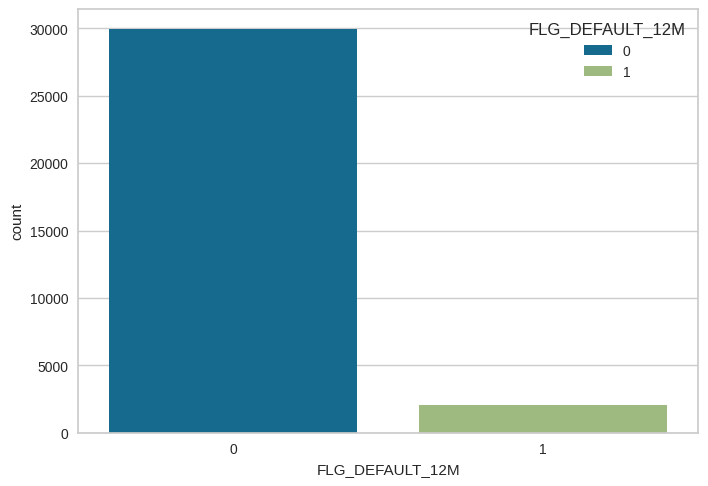

In [ ]:
sns.countplot(data = df_clase, x = "FLG_DEFAULT_12M", hue="FLG_DEFAULT_12M")
target_count = df_clase.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

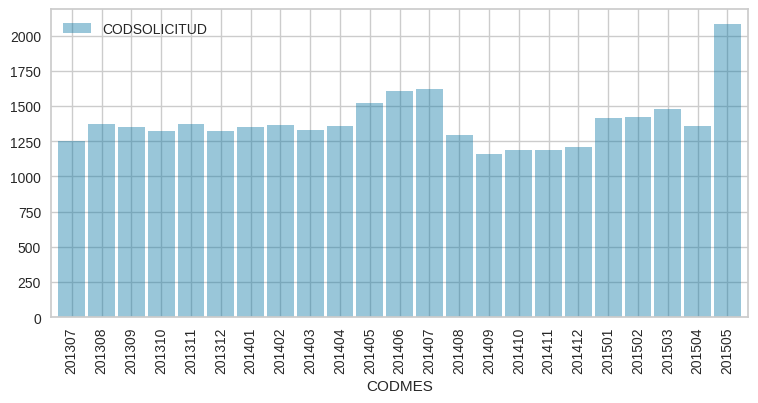

In [ ]:
a1=df_clase.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

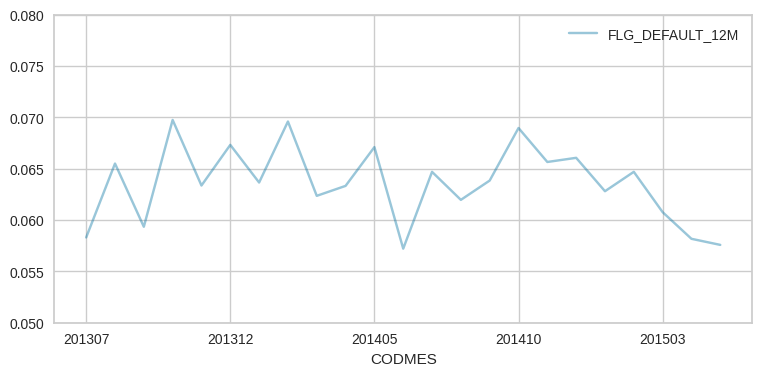

In [ ]:
a2=df_clase.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.05,0.08))

### ***Hagamos el Análisis Univariado***

Revisemos la cantidad de nulos y sus proporciones por variable

In [ ]:
null_values = pd.concat([df_clase.isnull().sum(), df_clase.isnull().sum() / len(df_clase)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values

,number_null_values,ratio_null_values
CODMES,0,0.000000
CODSOLICITUD,0,0.000000
DEUDA,0,0.000000
PLAZO_CREDITO,0,0.000000
FLG_GARANTIA,0,0.000000
MIN_MES_DE_DEFAULT,0,0.000000
FLG_DEFAULT_12M,0,0.000000
SEGMENTOCLIENTE,0,0.000000
TARJETA_RELACIONADA,0,0.000000
VEHICULAR_RELACIONADA,0,0.000000


Revisemos sus estadísticos básicos

In [ ]:
df_clase.select_dtypes(include=['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,31944.0,5769.284906,5848.504517,8.791365,1602.717111,3768.298333,7786.406583,2.054835e+05
PLAZO_CREDITO,31944.0,39.996588,15.623734,6.000000,24.000000,48.000000,48.000000,6.000000e+01
FLG_DEFAULT_12M,31944.0,0.063361,0.243615,0.000000,0.000000,0.000000,0.000000,1.000000e+00
ATRASO_MAXIMO_ULT_6M,31944.0,0.254070,3.028339,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,31941.0,1.074168,38.857057,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,31937.0,2.107931,47.275929,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,31266.0,5.157935,1.449751,1.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,31942.0,7161.642671,8621.384272,0.000000,1703.222083,4325.187267,9396.200433,8.185772e+05
DEUDA_TOTAL_SISTEMA,28763.0,24409.216018,58799.081039,0.000000,1505.645000,6745.890000,20973.860000,1.458561e+06
NUMERO_DE_PAGOS_PDH,31944.0,16.291948,9.419303,0.000000,7.000000,24.000000,24.000000,2.400000e+01


In [ ]:
df_clase.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
CODMES,31944,23,201505,2084
CODSOLICITUD,31944,31944,1,1
FLG_GARANTIA,31944,2,0,30605
MIN_MES_DE_DEFAULT,31944,37,nan,28495
SEGMENTOCLIENTE,31944,7,CLIENTES ORO,22101
TARJETA_RELACIONADA,31944,2,1,19914
VEHICULAR_RELACIONADA,31944,2,0,31612
HIPOTECARIO_RELACIONADA,31944,2,0,31212
CLASIF_SISTEMA_ULT_12M,31944,6,0.0,23640
FLG_PDH,31944,2,1,26825


Revisemos como se distribuye cada variable

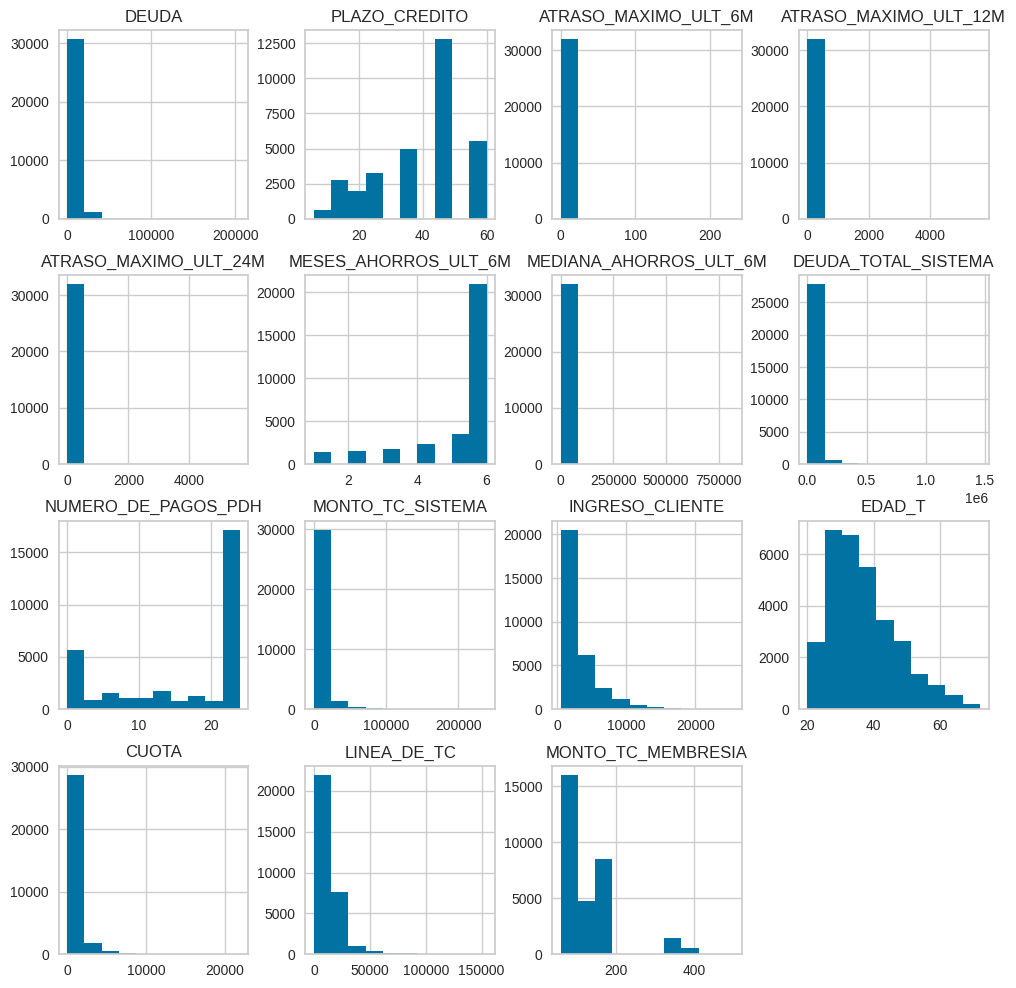

In [ ]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).hist(figsize = (12, 12))
plt.show()

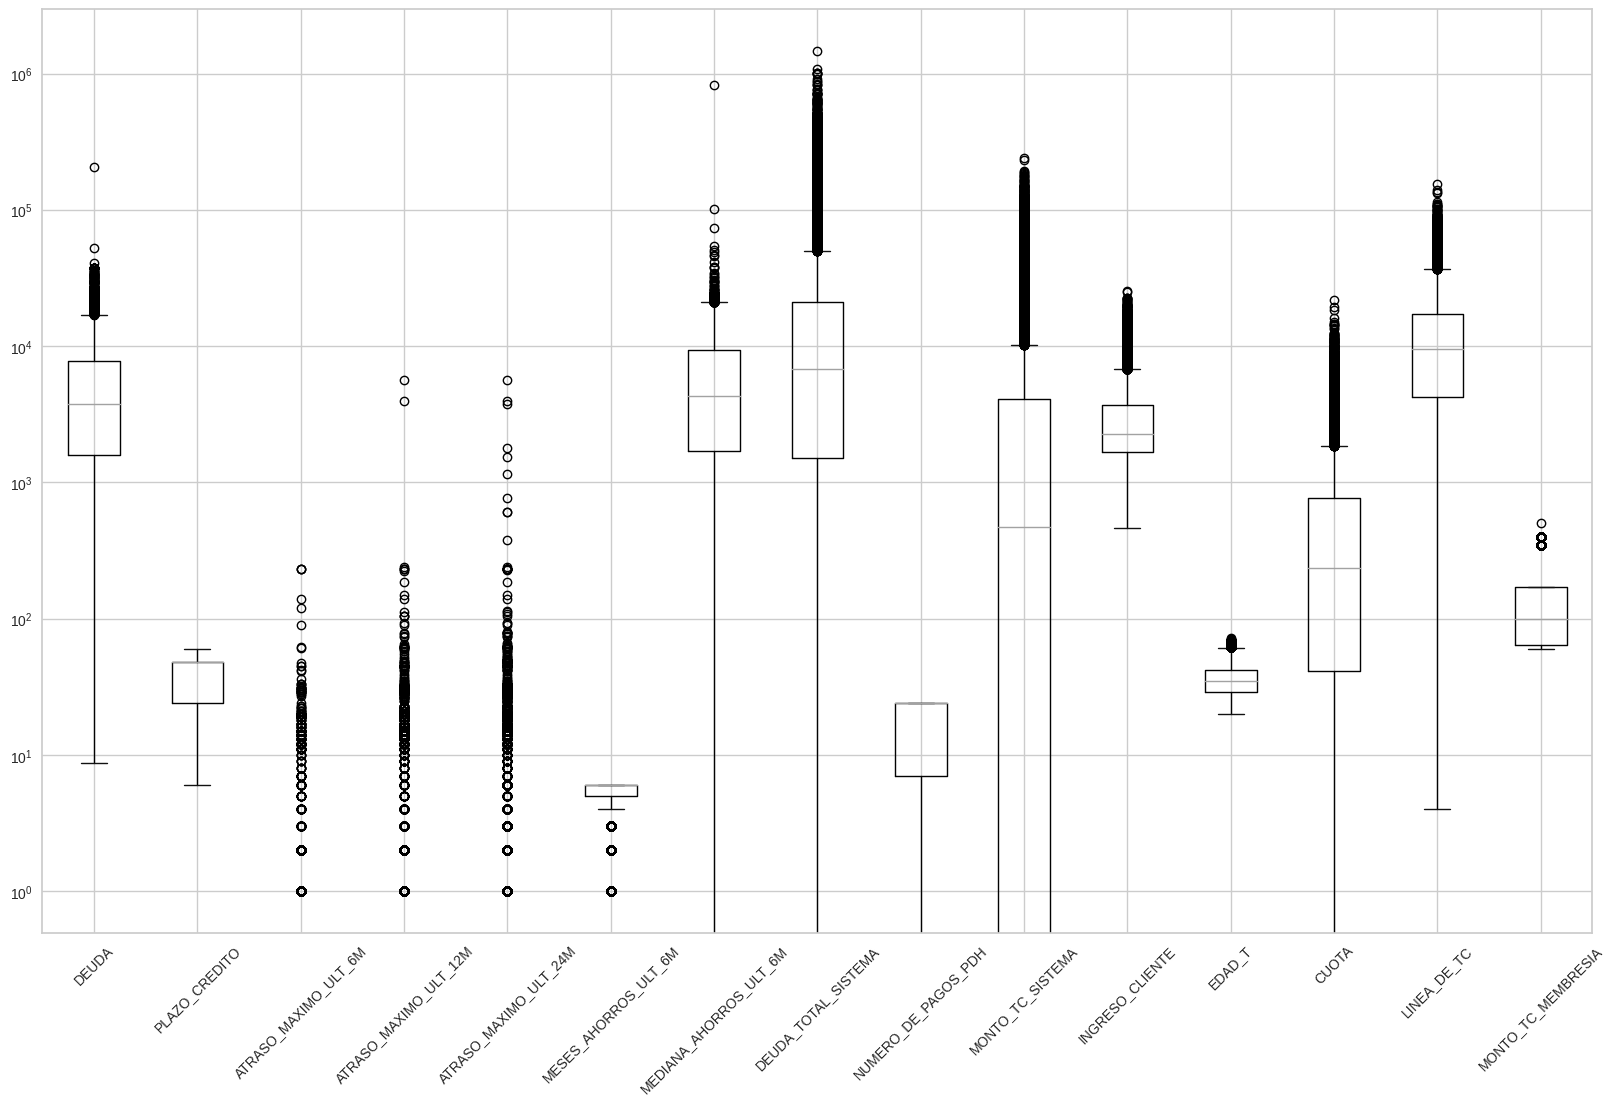

In [ ]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).boxplot(figsize = (20, 12))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
def outliers_col(df):
  for columna in df:
    if df[columna].dtype != object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-1.5*iqr
      lim_sup = q3+1.5*iqr
      n_outliers_inf = len(df[(df[columna]<lim_inf)])
      n_outliers_sup = len(df[(df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers_inf,
          n_outliers_sup
          ))

In [ ]:
outliers_col(df_clase)

DEUDA | 0 | 2126
PLAZO_CREDITO | 0 | 0
FLG_DEFAULT_12M | 0 | 2024
ATRASO_MAXIMO_ULT_6M | 0 | 2005
ATRASO_MAXIMO_ULT_12M | 0 | 4154
ATRASO_MAXIMO_ULT_24M | 0 | 6634
MESES_AHORROS_ULT_6M | 4635 | 0
MEDIANA_AHORROS_ULT_6M | 0 | 3318
DEUDA_TOTAL_SISTEMA | 0 | 1880
NUMERO_DE_PAGOS_PDH | 0 | 0
MONTO_TC_SISTEMA | 0 | 4470
INGRESO_CLIENTE | 0 | 2512
EDAD_T | 0 | 350
CUOTA | 0 | 2867
LINEA_DE_TC | 0 | 1200
MONTO_TC_MEMBRESIA | 0 | 2015


# **3. Feature Engineering**

#### 3.1 Tratamiento de Missing:
####Según el caso elegiremos rellenar estos casos con un valor usualmente conocido (dado el tipo de variable que estemos analizando), o imputar con la mediana o el valor más frecuente, según sea numérica o categórica respectivamente

In [ ]:
# Para partir las bases
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
pip install feature_engine

### Partición Train y test (considerando estratificación de la Y)

In [ ]:
# Llamemos a la librería feature engine
from feature_engine.imputation import MeanMedianImputer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("FLG_DEFAULT_12M", axis=1),
    df_clase["FLG_DEFAULT_12M"],
    test_size=0.3,
    random_state=0,
    stratify=df_clase["FLG_DEFAULT_12M"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((22360, 30), (9584, 30))

In [ ]:
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.06337209302325582

In [ ]:
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

0.0633347245409015

In [ ]:
X_train.isnull().mean().where(X_train.isnull().mean()>0)

CODMES                          NaN
CODSOLICITUD                    NaN
DEUDA                           NaN
PLAZO_CREDITO                   NaN
FLG_GARANTIA                    NaN
MIN_MES_DE_DEFAULT              NaN
SEGMENTOCLIENTE                 NaN
TARJETA_RELACIONADA             NaN
VEHICULAR_RELACIONADA           NaN
HIPOTECARIO_RELACIONADA         NaN
ATRASO_MAXIMO_ULT_6M            NaN
ATRASO_MAXIMO_ULT_12M      0.000045
ATRASO_MAXIMO_ULT_24M      0.000179
MESES_AHORROS_ULT_6M       0.020081
MEDIANA_AHORROS_ULT_6M     0.000089
DEUDA_TOTAL_SISTEMA        0.100134
CLASIF_SISTEMA_ULT_12M          NaN
FLG_PDH                         NaN
NUMERO_DE_PAGOS_PDH             NaN
MONTO_TC_SISTEMA                NaN
INGRESO_CLIENTE            0.024240
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
EDAD_T                     0.030367
CUOTA                      0.020081
LINEA_DE_TC                0.020081
MONTO_TC_MEMBRESIA         0

### Empecemos con las variable numéricas

In [ ]:
var_num = X_train.select_dtypes(include = ["number"])
var_num.isnull().mean().where(var_num.isnull().mean()>0)

DEUDA                          NaN
PLAZO_CREDITO                  NaN
ATRASO_MAXIMO_ULT_6M           NaN
ATRASO_MAXIMO_ULT_12M     0.000045
ATRASO_MAXIMO_ULT_24M     0.000179
MESES_AHORROS_ULT_6M      0.020081
MEDIANA_AHORROS_ULT_6M    0.000089
DEUDA_TOTAL_SISTEMA       0.100134
NUMERO_DE_PAGOS_PDH            NaN
MONTO_TC_SISTEMA               NaN
INGRESO_CLIENTE           0.024240
EDAD_T                    0.030367
CUOTA                     0.020081
LINEA_DE_TC               0.020081
MONTO_TC_MEMBRESIA        0.020081
dtype: float64

In [ ]:
# Aplicaremos el imputador de missing
imputer_1 = MeanMedianImputer(
    imputation_method='median',
    variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'],
)

imputer_1.fit(X_train)

MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T', 'INGRESO_CLIENTE'])

In [ ]:
# dejamos 'CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M',
#         'ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA'

In [ ]:
imputer_1.variables_

['LINEA_DE_TC', 'EDAD_T', 'INGRESO_CLIENTE']

In [ ]:
imputer_1.imputer_dict_

{'LINEA_DE_TC': 9609.0, 'EDAD_T': 35.0, 'INGRESO_CLIENTE': 2271.1773555}

In [ ]:
X_train[imputer_1.variables_].median()

LINEA_DE_TC        9609.000000
EDAD_T               35.000000
INGRESO_CLIENTE    2271.177355
dtype: float64

In [ ]:
X_train_t = imputer_1.transform(X_train)
X_test_t = imputer_1.transform(X_test)

In [ ]:
X_train_t[imputer_1.variables_].isnull().mean()

LINEA_DE_TC        0.0
EDAD_T             0.0
INGRESO_CLIENTE    0.0
dtype: float64

In [ ]:
X_test_t[imputer_1.variables_].isnull().mean()

LINEA_DE_TC        0.0
EDAD_T             0.0
INGRESO_CLIENTE    0.0
dtype: float64

In [ ]:
from feature_engine.imputation import ArbitraryNumberImputer

In [ ]:
imputer_2 = ArbitraryNumberImputer(
    arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']
)

imputer_2.fit(X_train)

#imputer_2 = ArbitraryNumberImputer(
#    imputer_dict={
#        'CUOTA': -999,
#        'DEUDA_TOTAL_SISTEMA': -999,
#        'MEDIANA_AHORROS_ULT_6M': -1,
#        'MESES_AHORROS_ULT_6M': -1,
#        'ATRASO_MAXIMO_ULT_24M': 0,
#        'ATRASO_MAXIMO_ULT_12M': 0,
#        'MONTO_TC_MEMBRESIA': 0
#    }
#)
#
#imputer_2.fit(X_train)


ArbitraryNumberImputer(arbitrary_number=0,
                       variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA',
                                  'MEDIANA_AHORROS_ULT_6M',
                                  'MESES_AHORROS_ULT_6M',
                                  'ATRASO_MAXIMO_ULT_24M',
                                  'ATRASO_MAXIMO_ULT_12M',
                                  'MONTO_TC_MEMBRESIA'])

In [ ]:
imputer_2.variables_

['CUOTA',
 'DEUDA_TOTAL_SISTEMA',
 'MEDIANA_AHORROS_ULT_6M',
 'MESES_AHORROS_ULT_6M',
 'ATRASO_MAXIMO_ULT_24M',
 'ATRASO_MAXIMO_ULT_12M',
 'MONTO_TC_MEMBRESIA']

In [ ]:
imputer_2.arbitrary_number

0

In [ ]:
X_train_t = imputer_2.transform(X_train_t)
X_test_t = imputer_2.transform(X_test_t)

In [ ]:
X_train_t[imputer_2.variables_].isnull().mean()

CUOTA                     0.0
DEUDA_TOTAL_SISTEMA       0.0
MEDIANA_AHORROS_ULT_6M    0.0
MESES_AHORROS_ULT_6M      0.0
ATRASO_MAXIMO_ULT_24M     0.0
ATRASO_MAXIMO_ULT_12M     0.0
MONTO_TC_MEMBRESIA        0.0
dtype: float64

In [ ]:
X_test_t[imputer_2.variables_].isnull().mean()

CUOTA                     0.0
DEUDA_TOTAL_SISTEMA       0.0
MEDIANA_AHORROS_ULT_6M    0.0
MESES_AHORROS_ULT_6M      0.0
ATRASO_MAXIMO_ULT_24M     0.0
ATRASO_MAXIMO_ULT_12M     0.0
MONTO_TC_MEMBRESIA        0.0
dtype: float64

In [ ]:
#X_train.hist(bins = 50, figsize=(20,15))
#plt.show()

In [ ]:
var_num = X_train_t.select_dtypes(include = ["number"])
var_num.isnull().mean().where(var_num.isnull().mean()>0)

DEUDA                    NaN
PLAZO_CREDITO            NaN
ATRASO_MAXIMO_ULT_6M     NaN
ATRASO_MAXIMO_ULT_12M    NaN
ATRASO_MAXIMO_ULT_24M    NaN
MESES_AHORROS_ULT_6M     NaN
MEDIANA_AHORROS_ULT_6M   NaN
DEUDA_TOTAL_SISTEMA      NaN
NUMERO_DE_PAGOS_PDH      NaN
MONTO_TC_SISTEMA         NaN
INGRESO_CLIENTE          NaN
EDAD_T                   NaN
CUOTA                    NaN
LINEA_DE_TC              NaN
MONTO_TC_MEMBRESIA       NaN
dtype: float64

In [ ]:
# Usemos Pipelines para concatenar diferentes métodos de imputación
pipe_1 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(
                imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']
            ),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(
                arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']
        ),
        ),
    ]
)

In [ ]:
pipe_1.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA']))])

In [ ]:
pipe_1.named_steps["median_imputer"].imputer_dict_

{'LINEA_DE_TC': 9609.0, 'EDAD_T': 35.0, 'INGRESO_CLIENTE': 2271.1773555}

In [ ]:
pipe_1.named_steps["arbitrary_imputer"].imputer_dict_

{'CUOTA': 0,
 'DEUDA_TOTAL_SISTEMA': 0,
 'MEDIANA_AHORROS_ULT_6M': 0,
 'MESES_AHORROS_ULT_6M': 0,
 'ATRASO_MAXIMO_ULT_24M': 0,
 'ATRASO_MAXIMO_ULT_12M': 0,
 'MONTO_TC_MEMBRESIA': 0}

In [ ]:
X_train_t = pipe_1.transform(X_train)
X_test_t = pipe_1.transform(X_test)

In [ ]:
X_train_t.isnull().mean()

CODMES                     0.000000
CODSOLICITUD               0.000000
DEUDA                      0.000000
PLAZO_CREDITO              0.000000
FLG_GARANTIA               0.000000
MIN_MES_DE_DEFAULT         0.000000
SEGMENTOCLIENTE            0.000000
TARJETA_RELACIONADA        0.000000
VEHICULAR_RELACIONADA      0.000000
HIPOTECARIO_RELACIONADA    0.000000
ATRASO_MAXIMO_ULT_6M       0.000000
ATRASO_MAXIMO_ULT_12M      0.000000
ATRASO_MAXIMO_ULT_24M      0.000000
MESES_AHORROS_ULT_6M       0.000000
MEDIANA_AHORROS_ULT_6M     0.000000
DEUDA_TOTAL_SISTEMA        0.000000
CLASIF_SISTEMA_ULT_12M     0.000000
FLG_PDH                    0.000000
NUMERO_DE_PAGOS_PDH        0.000000
MONTO_TC_SISTEMA           0.000000
INGRESO_CLIENTE            0.000000
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
EDAD_T                     0.000000
CUOTA                      0.000000
LINEA_DE_TC                0.000000
MONTO_TC_MEMBRESIA         0

In [ ]:
X_test_t.isnull().mean()

CODMES                     0.000000
CODSOLICITUD               0.000000
DEUDA                      0.000000
PLAZO_CREDITO              0.000000
FLG_GARANTIA               0.000000
MIN_MES_DE_DEFAULT         0.000000
SEGMENTOCLIENTE            0.000000
TARJETA_RELACIONADA        0.000000
VEHICULAR_RELACIONADA      0.000000
HIPOTECARIO_RELACIONADA    0.000000
ATRASO_MAXIMO_ULT_6M       0.000000
ATRASO_MAXIMO_ULT_12M      0.000000
ATRASO_MAXIMO_ULT_24M      0.000000
MESES_AHORROS_ULT_6M       0.000000
MEDIANA_AHORROS_ULT_6M     0.000000
DEUDA_TOTAL_SISTEMA        0.000000
CLASIF_SISTEMA_ULT_12M     0.000000
FLG_PDH                    0.000000
NUMERO_DE_PAGOS_PDH        0.000000
MONTO_TC_SISTEMA           0.000000
INGRESO_CLIENTE            0.000000
PROFESION                  0.011477
ZONA_DEL_DESEMBOLSO        0.032450
ESTADO_CIVIL               0.032450
EDAD_T                     0.000000
CUOTA                      0.000000
LINEA_DE_TC                0.000000
MONTO_TC_MEMBRESIA         0

### Continuemos con las variables categóricas

In [ ]:
var_cat = X_train.select_dtypes(exclude = ["number"])
var_cat.isnull().mean().where(var_cat.isnull().mean()>0)

CODMES                          NaN
CODSOLICITUD                    NaN
FLG_GARANTIA                    NaN
MIN_MES_DE_DEFAULT              NaN
SEGMENTOCLIENTE                 NaN
TARJETA_RELACIONADA             NaN
VEHICULAR_RELACIONADA           NaN
HIPOTECARIO_RELACIONADA         NaN
CLASIF_SISTEMA_ULT_12M          NaN
FLG_PDH                         NaN
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
FLG_TC_VISA                     NaN
FLG_TC_MC                       NaN
dtype: float64

In [ ]:
from feature_engine.imputation import CategoricalImputer

In [ ]:
imputer_3 = CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
# si no se especifica el método de imputación, le imputará el valor "Missing"
imputer_3.fit(X_train)

CategoricalImputer(imputation_method='frequent',
                   variables=['PROFESION', 'ZONA_DEL_DESEMBOLSO',
                              'ESTADO_CIVIL'])

In [ ]:
imputer_3.variables_

['PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL']

In [ ]:
imputer_3.imputer_dict_

{'PROFESION': 'TECNICO',
 'ZONA_DEL_DESEMBOLSO': 'AREQUIPA',
 'ESTADO_CIVIL': 'SOL'}

In [ ]:
X_train_t = imputer_3.transform(X_train_t)
X_test_t = imputer_3.transform(X_test_t)

In [ ]:
X_train_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [ ]:
X_test_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [ ]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación en uno solo
pipe_2 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
    ]
)

In [ ]:
pipe_2.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL']))])

In [ ]:
X_train_t = pipe_2.transform(X_train)
X_test_t = pipe_2.transform(X_test)

In [ ]:
X_train_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [ ]:
X_test_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

### 3.2 Tratamiento de Valores Raros o Poco frecuentes
En este punto, nos detenemos para revisar problemas de cardinalidad y si existen valores raros o poco frecuentes en nuestras variables categóricas

In [ ]:
cat_cols=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC']

In [ ]:
# Examinemos esto en la muestra de train
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_train_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  7
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  170
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [ ]:
#Examinemos esto en la muestra de test
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_test_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  5
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  138
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [ ]:
# Analicemos la variable Profesión
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 37
El nro de categorias que aparecen en el test y no en el train es 5


In [ ]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 2
El nro de categorias que aparecen en el test y no en el train es 0


In [ ]:
# Analicemos la variable Zona
unique_to_train_set = [x for x in X_train_t.ZONA_DEL_DESEMBOLSO.unique() if x not in X_test_t.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.ZONA_DEL_DESEMBOLSO.unique() if x not in X_train_t.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


### Podemos decir que las demás variables categóricas efectivamente no presentan ningún problema en train o test?

#### Entonces debemos de revisar cardinalidad y valores raros

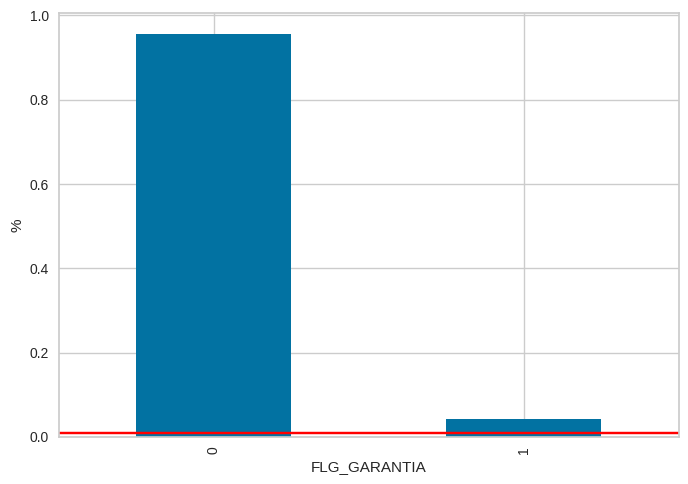

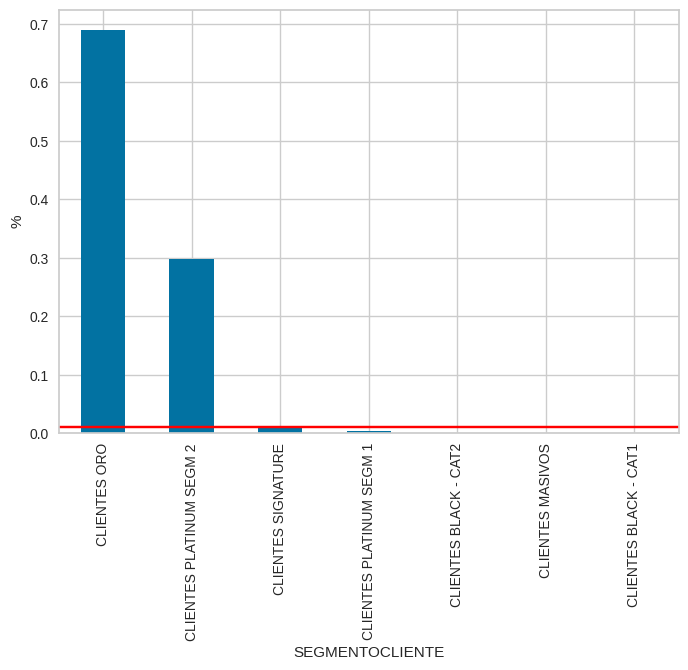

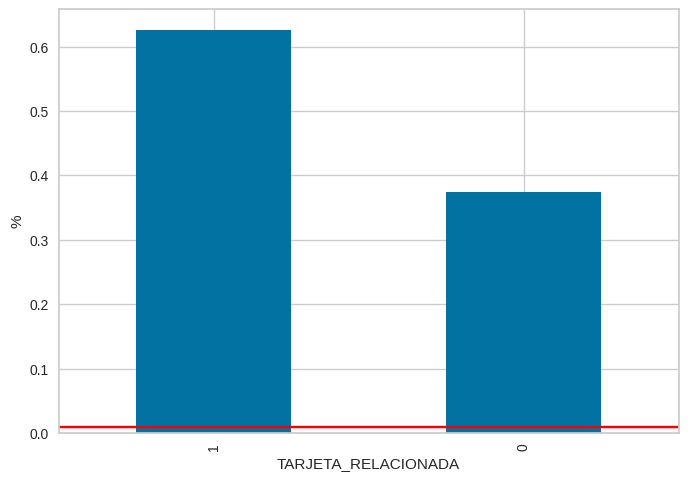

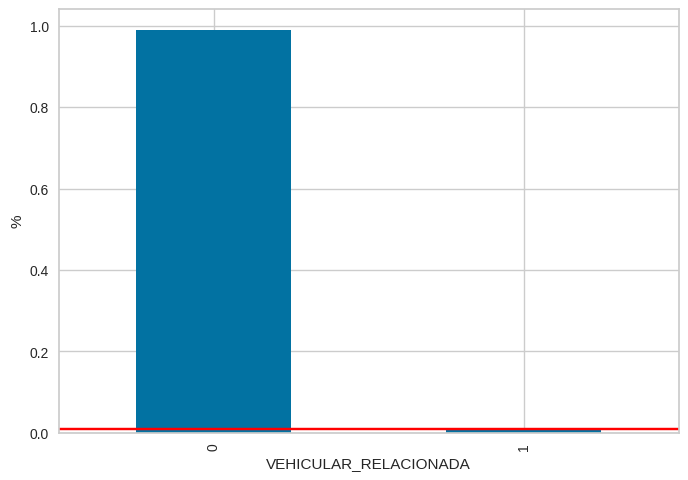

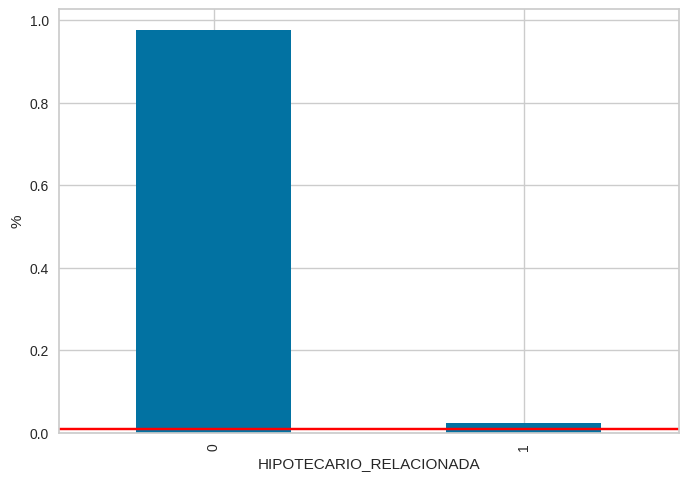

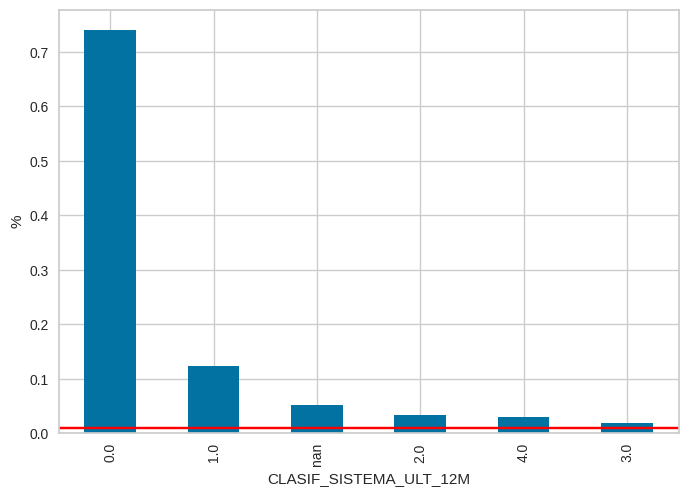

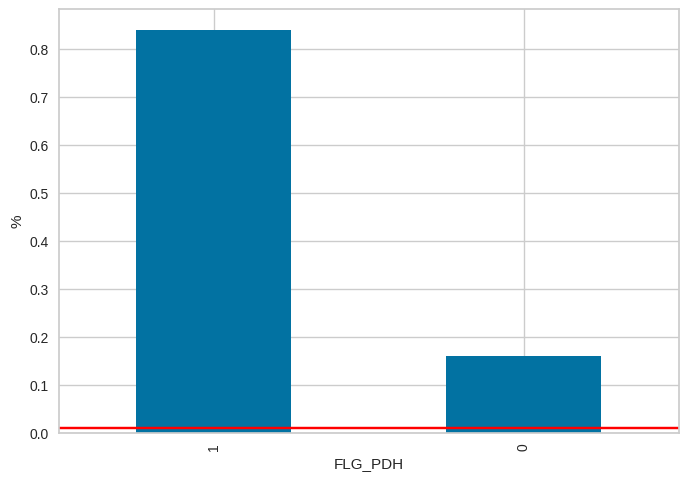

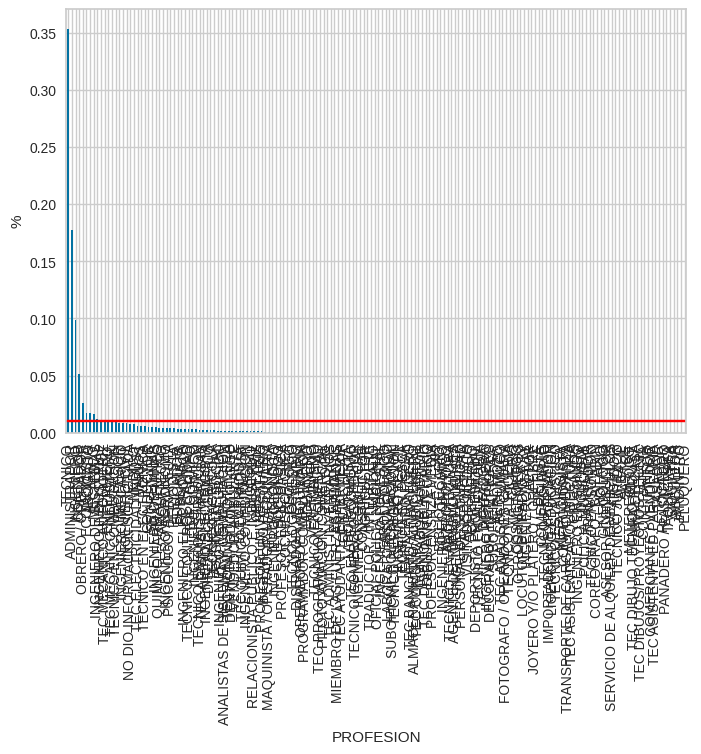

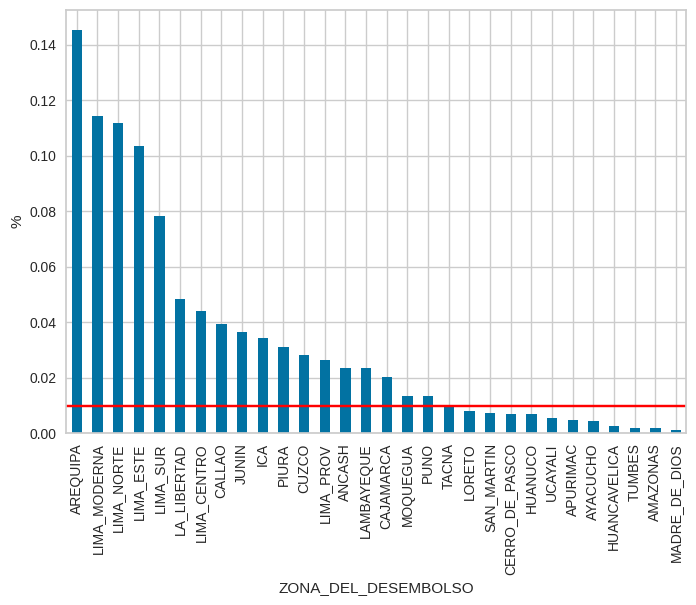

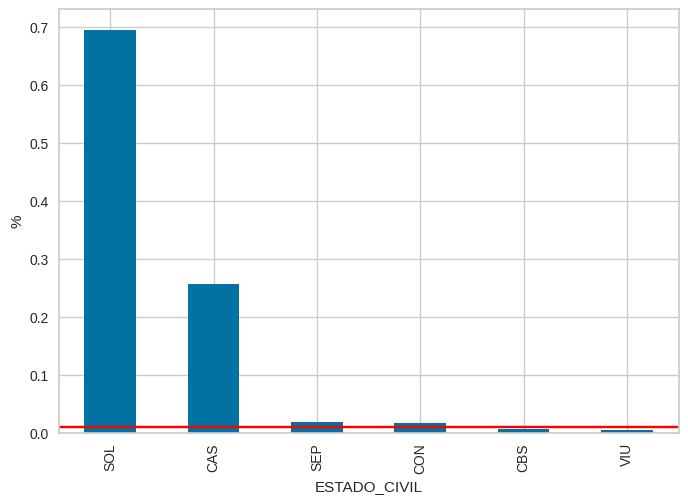

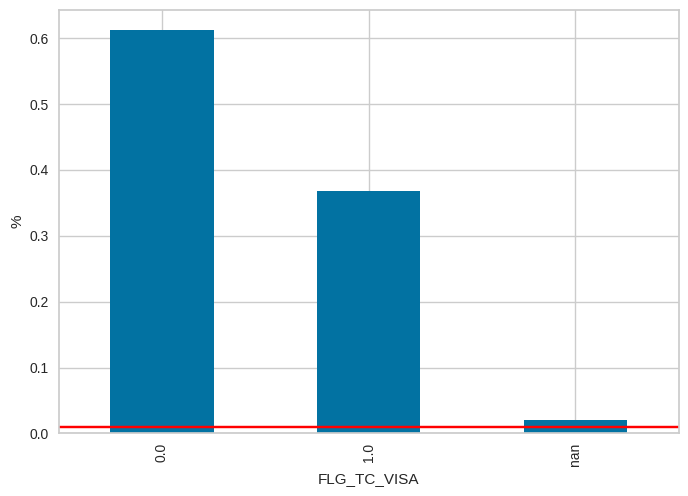

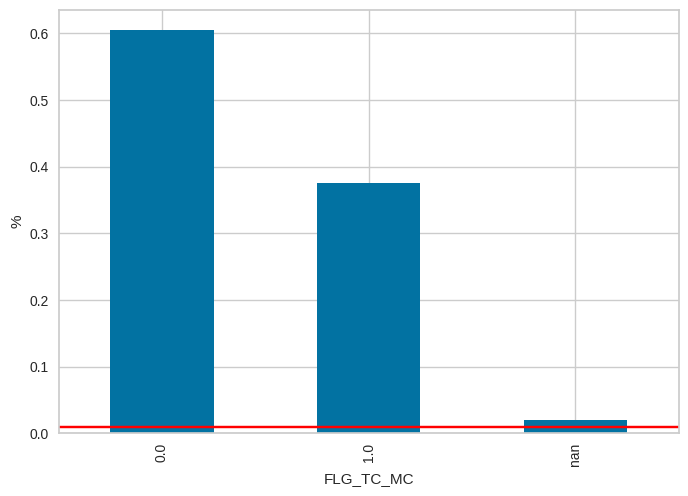

In [ ]:
total = len(X_train_t)
for col in cat_cols:
    temp_df = pd.Series(X_train_t[col].value_counts() / total)
    fig = temp_df.sort_values(ascending=False).plot.bar() #figsize=(10,5)
    fig.set_xlabel(col)
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('%')
    plt.show()

In [ ]:
tot_train_t=pd.concat([X_train_t, y_train], axis=1)
tot_train_t.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,...,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC,FLG_DEFAULT_12M
1517,201403,1518,17512.679170,60,0,nan,CLIENTES PLATINUM SEGM 2,1,0,0,...,ADMINISTRADOR,CALLAO,SOL,34.0,57.866550,12592.0,170.0,0.0,0.0,0
27337,201503,27338,2932.398333,48,1,nan,CLIENTES PLATINUM SEGM 2,0,0,1,...,CONTADOR,SAN_MARTIN,SOL,28.0,1808.308516,15569.0,100.0,1.0,1.0,0
573,201309,574,4790.418259,48,0,nan,CLIENTES ORO,0,0,0,...,MIEMBRO DE LAS FUERZAS ARMADAS,LIMA_NORTE,SEP,41.0,793.981440,6211.0,76.0,1.0,1.0,0
31740,201505,31741,824.938742,48,0,nan,CLIENTES ORO,0,0,0,...,TECNICO,AREQUIPA,CAS,45.0,890.709120,20716.0,78.0,1.0,1.0,0
25079,201504,25080,2665.816667,24,0,nan,CLIENTES PLATINUM SEGM 2,1,0,1,...,INGENIERO,LIMA_ESTE,CAS,48.0,9996.581553,14000.0,400.0,0.0,0.0,0


In [ ]:
def calculate_mean_target_per_category(df, var):
    total = len(df)
    temp_df = pd.Series(df[var].value_counts() / total).reset_index()
    temp_df.columns = [var, '%']
    temp_df = temp_df.merge(df.groupby([var])['FLG_DEFAULT_12M'].mean().reset_index(),
                            on=var,
                            how='left')
    return temp_df

In [ ]:
temp_df = calculate_mean_target_per_category(tot_train_t, 'PROFESION')
temp_df

,PROFESION,%,FLG_DEFAULT_12M
0,TECNICO,0.352773,0.079741
1,ADMINISTRADOR,0.176878,0.065740
2,INGENIERO,0.098479,0.039510
3,CONTADOR,0.051476,0.041703
4,OBRERO / OPERADOR,0.026073,0.087479
...,...,...,...
165,GINECOLOGO,0.000045,0.000000
166,NOTARIO,0.000045,0.000000
167,COREOGRAFO / BAILARIN,0.000045,0.000000
168,TECNICO EN SONIDO,0.000045,0.000000


In [ ]:
def plot_categories(df, var):
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)
    ax2 = ax.twinx()
    ax.bar(df.index, df["%"], color='lightgrey')
    ax2.plot(df.index, df["FLG_DEFAULT_12M"], color='green', label='Seconds')
    ax.axhline(y=0.01, color='red')
    ax.set_ylabel('Freq %')
    ax.set_xlabel(var)
    ax2.set_ylabel('Bad Rate')
    plt.show()

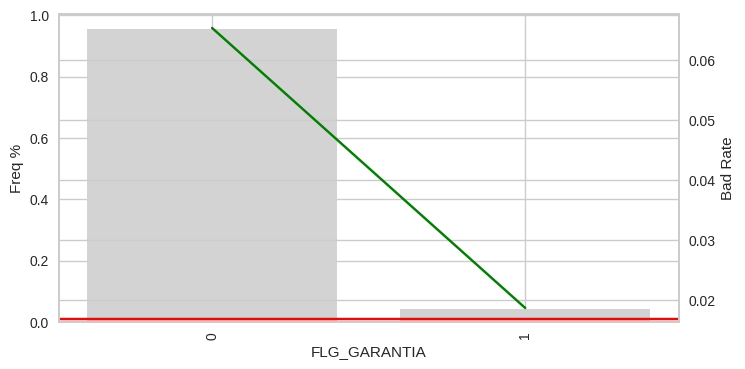

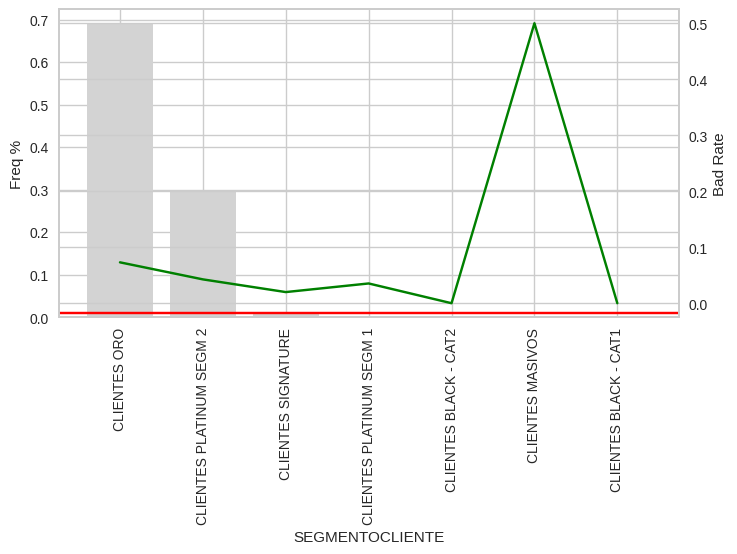

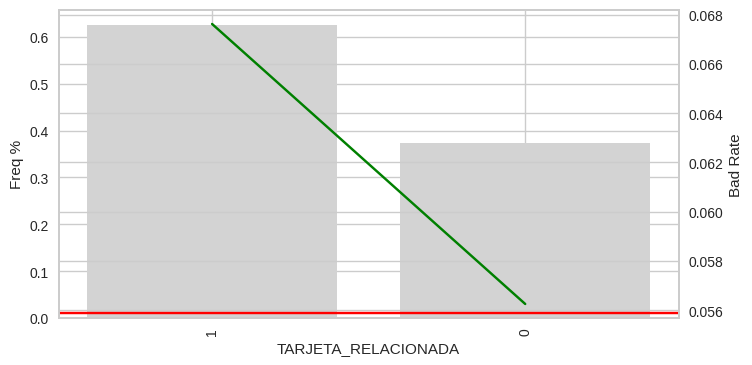

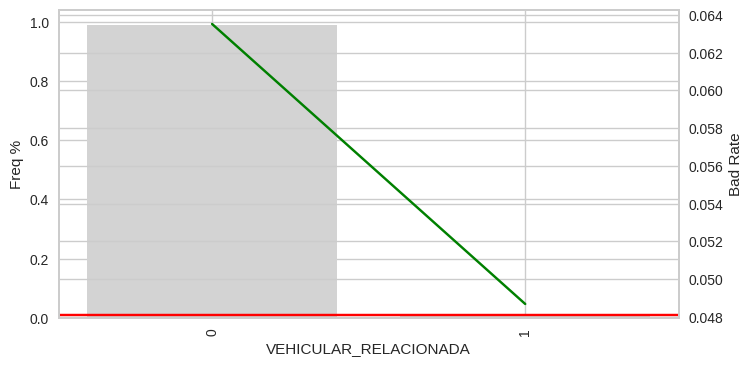

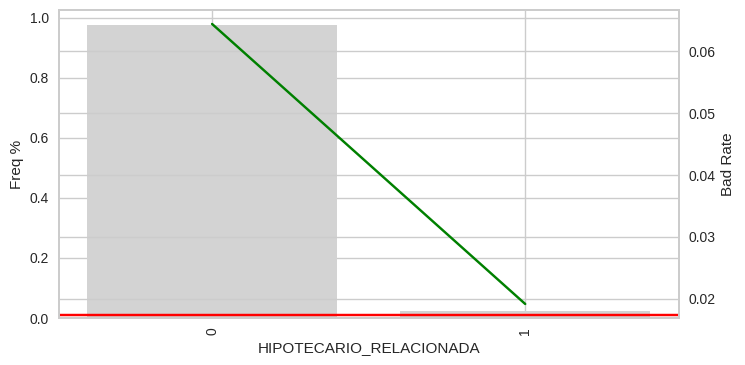

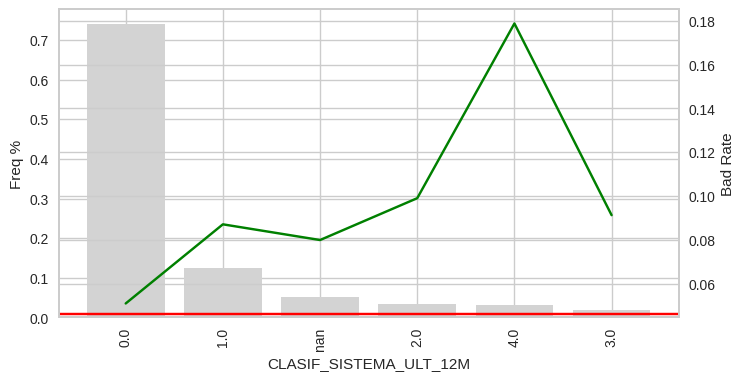

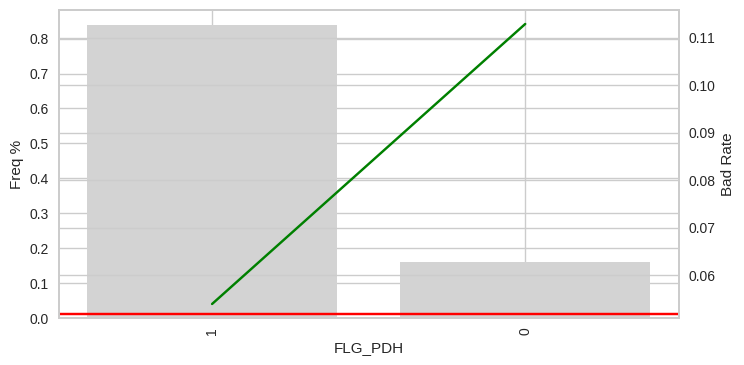

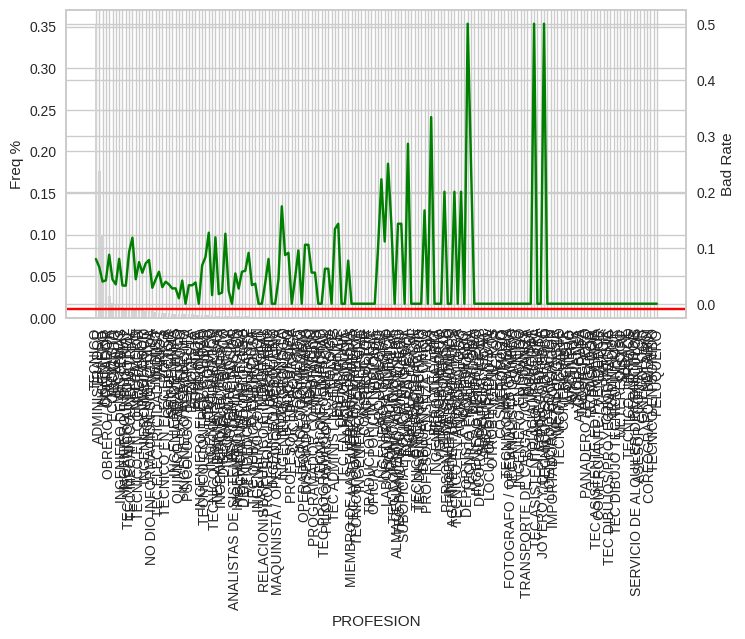

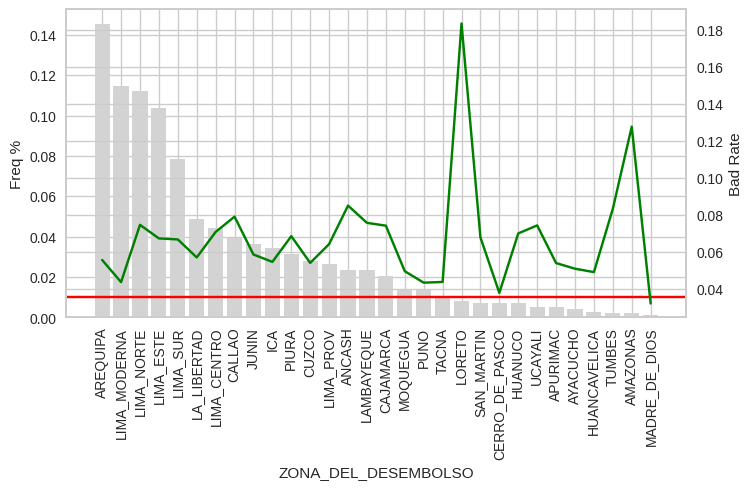

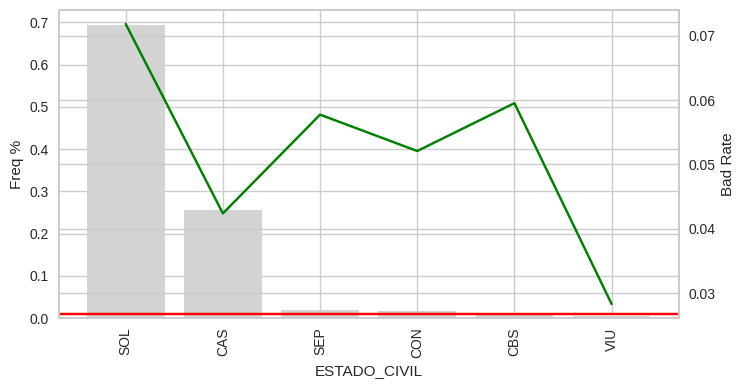

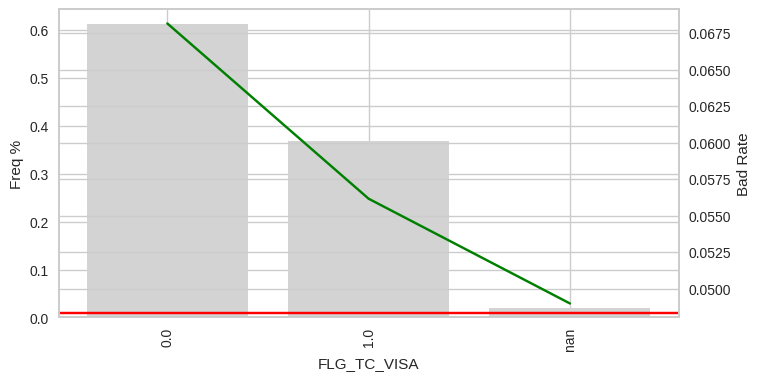

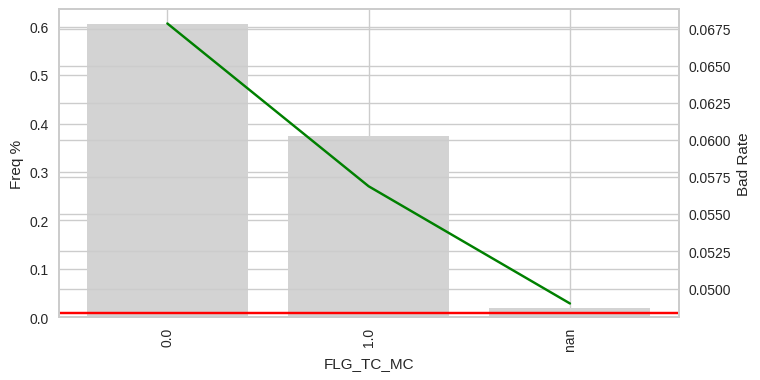

In [ ]:
for col in cat_cols:
  temp_df = calculate_mean_target_per_category(tot_train_t, col)
  plot_categories(temp_df, col)

In [ ]:
from feature_engine.encoding import RareLabelEncoder
rare_encoder = RareLabelEncoder(
    tol=0.01,
    n_categories=5,
    variables=["PROFESION","SEGMENTOCLIENTE",],
)

In [ ]:
rare_encoder.fit(X_train_t)

RareLabelEncoder(n_categories=5, tol=0.01,
                 variables=['PROFESION', 'SEGMENTOCLIENTE'])

In [ ]:
rare_encoder.variables_

['PROFESION', 'SEGMENTOCLIENTE']

In [ ]:
rare_encoder.encoder_dict_

{'PROFESION': ['TECNICO',
  'ADMINISTRADOR',
  'INGENIERO',
  'CONTADOR',
  'OBRERO / OPERADOR',
  'ECONOMISTA',
  'ABOGADO',
  'MECANICO',
  'INGENIERO DE SISTEMAS',
  'INGENIERO INDUSTRIAL',
  'TEC MECANICO AUTOMOTRIZ',
  'TEC MECANICO INDUSTRIAL',
  'ENFERMERO'],
 'SEGMENTOCLIENTE': ['CLIENTES ORO', 'CLIENTES PLATINUM SEGM 2']}

In [ ]:
X_train_t = rare_encoder.transform(X_train_t)
X_test_t = rare_encoder.transform(X_test_t)

In [ ]:
X_train_t.PROFESION.value_counts()

PROFESION
TECNICO                    7888
Rare                       4230
ADMINISTRADOR              3955
INGENIERO                  2202
CONTADOR                   1151
OBRERO / OPERADOR           583
ECONOMISTA                  393
ABOGADO                     376
MECANICO                    362
INGENIERO DE SISTEMAS       276
INGENIERO INDUSTRIAL        248
TEC MECANICO AUTOMOTRIZ     238
ENFERMERO                   229
TEC MECANICO INDUSTRIAL     229
Name: count, dtype: int64

In [ ]:
X_train_t.SEGMENTOCLIENTE.value_counts()

SEGMENTOCLIENTE
CLIENTES ORO                15423
CLIENTES PLATINUM SEGM 2     6646
Rare                          291
Name: count, dtype: int64

In [ ]:
# Analicemos la variable PROFESION
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [ ]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [ ]:
# Construyamos alternativamente un tercer pipeline con todos los métodos de imputación y codificación de valores raros en uno solo
pipe_3 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
    ]
)

In [ ]:
pipe_3.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL'])),
                ('rare_encoder',
                 RareLabelEncoder(n_categories=5, tol=0.01,
                                  variables=['PROFESION', 'SEGMENTOCLIENTE']))])

In [ ]:
X_train_t = pipe_3.transform(X_train)
X_test_t = pipe_3.transform(X_test)

In [ ]:
# Comprobando el funcionamiento del pipeline
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


### IMPORTANTE: Hasta aqui tenemos un pipeline para imputar nuestras variables numéricas y categóricas en caso de missing, además de generar un grupo de casos "Raros" para las variables categóricas donde encontramos problemas.

### 3.3 Tratamiento de Outliers y Escalamiento

In [ ]:
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,5800.149362,5912.375849,8.791365,1614.985000,3768.298333,7869.050000,2.054835e+05
PLAZO_CREDITO,22360.0,40.092084,15.547062,6.000000,24.000000,48.000000,48.000000,6.000000e+01
ATRASO_MAXIMO_ULT_6M,22360.0,0.274508,3.405186,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,22360.0,1.037478,38.114128,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,22360.0,2.151699,49.190130,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,22360.0,5.055903,1.605819,0.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,22360.0,7189.387085,9092.414168,0.000000,1712.270417,4362.920626,9507.471667,8.185772e+05
DEUDA_TOTAL_SISTEMA,22360.0,22073.208282,56672.958615,0.000000,556.875000,5136.870000,18553.420000,1.079214e+06
NUMERO_DE_PAGOS_PDH,22360.0,16.261538,9.426468,0.000000,7.000000,24.000000,24.000000,2.400000e+01
MONTO_TC_SISTEMA,22360.0,5604.264393,14250.281961,0.000000,0.000000,478.565000,4188.745000,2.393316e+05


In [ ]:
outliers_col(X_train_t)

DEUDA | 0 | 1459
PLAZO_CREDITO | 0 | 0
ATRASO_MAXIMO_ULT_6M | 0 | 1409
ATRASO_MAXIMO_ULT_12M | 0 | 2903
ATRASO_MAXIMO_ULT_24M | 0 | 4614
MESES_AHORROS_ULT_6M | 3689 | 0
MEDIANA_AHORROS_ULT_6M | 0 | 2284
DEUDA_TOTAL_SISTEMA | 0 | 2567
NUMERO_DE_PAGOS_PDH | 0 | 0
MONTO_TC_SISTEMA | 0 | 3110
INGRESO_CLIENTE | 0 | 2229
EDAD_T | 0 | 512
CUOTA | 0 | 2288
LINEA_DE_TC | 0 | 917
MONTO_TC_MEMBRESIA | 0 | 1427


In [ ]:
num_cols=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [ ]:
from feature_engine.outliers import Winsorizer
capper = Winsorizer(
    variables=num_cols,
    capping_method="quantiles",
    tail="right",
    fold=0.01,
)
capper.fit(X_train_t)

Winsorizer(capping_method='quantiles', fold=0.01,
           variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M', 'ATRASO_MAXIMO_ULT_12M',
                      'ATRASO_MAXIMO_ULT_24M', 'MEDIANA_AHORROS_ULT_6M',
                      'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA',
                      'INGRESO_CLIENTE', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
                      'MONTO_TC_MEMBRESIA'])

In [ ]:
X_train_t = capper.transform(X_train_t)
X_test_t = capper.transform(X_test_t)

In [ ]:
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,5767.696927,5662.719977,8.791365,1614.985000,3768.298333,7869.050000,23574.760420
PLAZO_CREDITO,22360.0,40.092084,15.547062,6.000000,24.000000,48.000000,48.000000,60.000000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,5.055903,1.605819,0.000000,5.000000,6.000000,6.000000,6.000000
MEDIANA_AHORROS_ULT_6M,22360.0,7146.544957,7272.373742,0.000000,1712.270417,4362.920626,9507.471667,24065.564330
DEUDA_TOTAL_SISTEMA,22360.0,20508.116018,43687.720951,0.000000,556.875000,5136.870000,18553.420000,280120.580200
NUMERO_DE_PAGOS_PDH,22360.0,16.261538,9.426468,0.000000,7.000000,24.000000,24.000000,24.000000
MONTO_TC_SISTEMA,22360.0,5286.382362,11951.112587,0.000000,0.000000,478.565000,4188.745000,72022.006800


### Ahora hagamos el escalado de variables de las variables numéricas

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler().set_output(transform="pandas")
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [ ]:
num_cols=['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train_t[num_cols])
X_train_t_numoutscal = scaler.transform(X_train_t[num_cols])
X_test_t_numoutscal = scaler.transform(X_test_t[num_cols])

In [ ]:
X_train_t_numoutscal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,0.319696,0.905446,-0.601130,-0.344306,0.000000e+00,0.655694,3.166974
PLAZO_CREDITO,22360.0,-0.329496,0.647794,-1.750000,-1.000000,0.000000e+00,0.000000,0.500000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000e+00,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000e+00,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000e+00,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,-0.944097,1.605819,-6.000000,-1.000000,0.000000e+00,0.000000,0.000000
MEDIANA_AHORROS_ULT_6M,22360.0,0.357095,0.932930,-0.559693,-0.340036,5.833685e-17,0.659964,2.527535
DEUDA_TOTAL_SISTEMA,22360.0,0.854122,2.427562,-0.285436,-0.254493,0.000000e+00,0.745507,15.279806
NUMERO_DE_PAGOS_PDH,22360.0,-0.455204,0.554498,-1.411765,-1.000000,0.000000e+00,0.000000,0.000000
MONTO_TC_SISTEMA,22360.0,1.147794,2.853149,-0.114250,-0.114250,0.000000e+00,0.885750,17.079923


In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
# Actualicemos nuestro pipeline
pipe_4 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        )
    ]
)

In [ ]:
pipe_4.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 Cat...
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['DEUDA', 'PLAZO_CREDITO',
                                                   'ATRASO_MAXIMO_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'NUMERO_DE_PAGOS_PDH',
                                                   'MONTO_TC_SISTEMA',
                                                   'INGRESO_CLIENTE', 'EDAD_T',
                                                   'CUOTA', 'LINEA_DE_TC',
                                                   'MONTO_TC_MEMBRESIA'])],
                                   verbose_feature_names_out=False))])

In [ ]:
X_train_t = pipe_4.transform(X_train)
X_test_t = pipe_4.transform(X_test)

In [ ]:
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,0.319696,0.905446,-0.601130,-0.344306,0.000000e+00,0.655694,3.166974
PLAZO_CREDITO,22360.0,-0.329496,0.647794,-1.750000,-1.000000,0.000000e+00,0.000000,0.500000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000e+00,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000e+00,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000e+00,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,-0.944097,1.605819,-6.000000,-1.000000,0.000000e+00,0.000000,0.000000
MEDIANA_AHORROS_ULT_6M,22360.0,0.357095,0.932930,-0.559693,-0.340036,5.833685e-17,0.659964,2.527535
DEUDA_TOTAL_SISTEMA,22360.0,0.854122,2.427562,-0.285436,-0.254493,0.000000e+00,0.745507,15.279806
NUMERO_DE_PAGOS_PDH,22360.0,-0.455204,0.554498,-1.411765,-1.000000,0.000000e+00,0.000000,0.000000
MONTO_TC_SISTEMA,22360.0,1.147794,2.853149,-0.114250,-0.114250,0.000000e+00,0.885750,17.079923


## **4. Feature Selection**
Ahora, podemos determinar cuanto aportan estas variables? para esto calculemos su IV

In [ ]:
tot_train_t=pd.concat([X_train_t[cat_cols], y_train], axis=1)
tot_train_t.head()

,FLG_GARANTIA,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_TC_VISA,FLG_TC_MC,FLG_DEFAULT_12M
1517,0,CLIENTES PLATINUM SEGM 2,1,0,0,0.0,1,ADMINISTRADOR,CALLAO,SOL,0.0,0.0,0
27337,1,CLIENTES PLATINUM SEGM 2,0,0,1,0.0,0,CONTADOR,SAN_MARTIN,SOL,1.0,1.0,0
573,0,CLIENTES ORO,0,0,0,0.0,1,Rare,LIMA_NORTE,SEP,1.0,1.0,0
31740,0,CLIENTES ORO,0,0,0,0.0,1,TECNICO,AREQUIPA,CAS,1.0,1.0,0
25079,0,CLIENTES PLATINUM SEGM 2,1,0,1,1.0,1,INGENIERO,LIMA_ESTE,CAS,0.0,0.0,0


In [ ]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [ ]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

### Generemos un reporte con todas los IVs

In [ ]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

### 4.1 Variables Categóricas

In [ ]:
getFeatureIV_Importance(tot_train_t,cat_cols,"FLG_DEFAULT_12M")

,Feature,IV
5,CLASIF_SISTEMA_ULT_12M,0.139344
6,FLG_PDH,0.107184
7,PROFESION,0.095820
1,SEGMENTOCLIENTE,0.067551
8,ZONA_DEL_DESEMBOLSO,0.060199
9,ESTADO_CIVIL,0.055085
0,FLG_GARANTIA,0.042176
4,HIPOTECARIO_RELACIONADA,0.021914
10,FLG_TC_VISA,0.010919
11,FLG_TC_MC,0.009376


### En este punto, quedémonos solo con las variables cuyo IV es mayor al 2% y menor a 50%

In [ ]:
cat_cols_2=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_GARANTIA','HIPOTECARIO_RELACIONADA']

### Codificación de variables categóricas:

In [ ]:
from feature_engine.encoding import WoEEncoder

In [ ]:
encoder_2 = WoEEncoder(variables=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL',
                                  'FLG_GARANTIA','HIPOTECARIO_RELACIONADA'],
                       fill_value=0) #ignore_format=False
encoder_2.fit(X_train_t[cat_cols_2], y_train)

WoEEncoder(fill_value=0,
           variables=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH',
                      'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL',
                      'FLG_GARANTIA', 'HIPOTECARIO_RELACIONADA'])

In [ ]:
X_train_woe_enc = encoder_2.transform(X_train_t[cat_cols_2])
X_test_woe_enc = encoder_2.transform(X_test_t[cat_cols_2])

In [ ]:
X_train_woe_enc.head()

,SEGMENTOCLIENTE,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_GARANTIA,HIPOTECARIO_RELACIONADA
1517,-0.419546,-0.229072,-0.171220,0.039208,0.238570,0.134467,0.033388,0.017669
27337,-0.419546,-0.229072,0.631614,-0.441326,0.073878,0.134467,-1.267551,-1.242477
573,0.151884,-0.229072,-0.171220,-0.273802,0.176343,-0.099129,0.033388,0.017669
31740,0.151884,-0.229072,-0.171220,0.247396,-0.136696,-0.424542,0.033388,0.017669
25079,-0.419546,0.344459,-0.171220,-0.497639,0.065255,-0.424542,0.033388,-1.242477


### 4.2 Variables numéricas

In [ ]:
X_train_t.select_dtypes(include=['number']).columns

Index(['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T',
       'CUOTA', 'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'],
      dtype='object')

In [ ]:
num_cols=['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

#### En este punto discretizo para luego encontrar el IV de las variables

In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [ ]:
disc1 = EqualFrequencyDiscretiser(q=10,
                                  variables=num_cols,
                                  return_boundaries=True,)
disc1.fit(X_train_t[num_cols])

EqualFrequencyDiscretiser(return_boundaries=True,
                          variables=['DEUDA', 'PLAZO_CREDITO',
                                     'ATRASO_MAXIMO_ULT_6M',
                                     'ATRASO_MAXIMO_ULT_12M',
                                     'ATRASO_MAXIMO_ULT_24M',
                                     'MESES_AHORROS_ULT_6M',
                                     'MEDIANA_AHORROS_ULT_6M',
                                     'DEUDA_TOTAL_SISTEMA',
                                     'NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA',
                                     'INGRESO_CLIENTE', 'EDAD_T', 'CUOTA',
                                     'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])

In [ ]:
X_train_t_numdisc=disc1.transform(X_train_t[num_cols])
X_test_t_numdisc=disc1.transform(X_test_t[num_cols])

In [ ]:
X_train_t_numdisc.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
1517,"(1.705, inf]","(0.0, inf]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.996, 2.205]","(-inf, -0.282]","(-0.471, inf]","(-inf, 0.0]","(2.201, inf]","(-0.154, 0.0]","(-0.283, -0.227]","(0.179, 0.43]","(0.545, 0.664]"
27337,"(-0.172, 0.0]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-inf, -4.0]","(0.218, 0.524]","(2.602, inf]","(-inf, -1.353]","(0.0, 0.216]","(0.481, 1.033]","(-0.692, -0.538]","(1.057, 2.284]","(0.43, 0.722]","(0.0, 0.282]"
573,"(0.0, 0.212]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(5.83e-17, 0.218]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.0, 0.173]","(0.385, 0.692]","(0.51, 1.057]","(-0.337, -0.169]","(-0.209, -0.155]"
31740,"(-0.473, -0.387]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.218, 0.524]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.173, 0.481]","(0.692, 1.231]","(0.51, 1.057]","(0.722, 1.113]","(-0.209, -0.155]"
25079,"(-0.286, -0.172]","(-1.5, -1.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(-0.162, 5.83e-17]","(2.602, inf]","(-0.471, inf]","(3.63, inf]","(2.201, inf]","(0.692, 1.231]","(2.284, inf]","(0.179, 0.43]","(0.664, inf]"


### Veamos cuales son las variables numéricas más importantes, basado en su IV

In [ ]:
tot_train_t2=pd.concat([X_train_t_numdisc, y_train], axis=1)
tot_train_t2.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_DEFAULT_12M
1517,"(1.705, inf]","(0.0, inf]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.996, 2.205]","(-inf, -0.282]","(-0.471, inf]","(-inf, 0.0]","(2.201, inf]","(-0.154, 0.0]","(-0.283, -0.227]","(0.179, 0.43]","(0.545, 0.664]",0
27337,"(-0.172, 0.0]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-inf, -4.0]","(0.218, 0.524]","(2.602, inf]","(-inf, -1.353]","(0.0, 0.216]","(0.481, 1.033]","(-0.692, -0.538]","(1.057, 2.284]","(0.43, 0.722]","(0.0, 0.282]",0
573,"(0.0, 0.212]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(5.83e-17, 0.218]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.0, 0.173]","(0.385, 0.692]","(0.51, 1.057]","(-0.337, -0.169]","(-0.209, -0.155]",0
31740,"(-0.473, -0.387]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.218, 0.524]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.173, 0.481]","(0.692, 1.231]","(0.51, 1.057]","(0.722, 1.113]","(-0.209, -0.155]",0
25079,"(-0.286, -0.172]","(-1.5, -1.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(-0.162, 5.83e-17]","(2.602, inf]","(-0.471, inf]","(3.63, inf]","(2.201, inf]","(0.692, 1.231]","(2.284, inf]","(0.179, 0.43]","(0.664, inf]",0


In [ ]:
getFeatureIV_Importance(tot_train_t2,num_cols,"FLG_DEFAULT_12M")

,Feature,IV
6,MEDIANA_AHORROS_ULT_6M,0.358339
10,INGRESO_CLIENTE,0.337741
5,MESES_AHORROS_ULT_6M,0.201981
8,NUMERO_DE_PAGOS_PDH,0.183294
1,PLAZO_CREDITO,0.173877
13,LINEA_DE_TC,0.082388
11,EDAD_T,0.079741
14,MONTO_TC_MEMBRESIA,0.058139
0,DEUDA,0.046217
4,ATRASO_MAXIMO_ULT_24M,0.034082


### Nuevamente, en este punto también solo quedémonos con las variables numéricas con IV mayor a 2% y menor a 50%

In [ ]:
num_cols_2=['MEDIANA_AHORROS_ULT_6M','INGRESO_CLIENTE','MESES_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH','PLAZO_CREDITO','LINEA_DE_TC','EDAD_T',
            'MONTO_TC_MEMBRESIA','DEUDA','ATRASO_MAXIMO_ULT_24M','DEUDA_TOTAL_SISTEMA','ATRASO_MAXIMO_ULT_12M']

### Actualizamos nuestro pipeline con todo el flujo de tratamiento de datos

In [ ]:
pipe_5 = Pipeline(
    [
        (   "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (   "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (   "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (   "encoder_2",
            WoEEncoder(variables=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL',
                                  'FLG_GARANTIA','HIPOTECARIO_RELACIONADA'],
                       fill_value=0)
        ),
    ]
)

In [ ]:
pipe_5.fit(X_train,y_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 Cat...
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'NUMERO_DE_PAGOS_PDH',
                                                   'MONTO_TC_SISTEMA',
                                                   'INGRESO_CLIENTE', 'EDAD_T',
                                                   'CUOTA', 'LINEA_DE_TC',
                                                   'MONTO_TC_MEMBRESIA'])],
                                   verbose_feature_names_out=False)),
                ('encoder_2',
                 WoEEncoder(fill_value=0,
                            variables=['SEGMENTOCLIENTE',
                                       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH',
                                       'PROFESION', 'ZONA_DEL_DESEMBOLSO',
                                       'ESTADO_CIVIL', 'FLG_GARANTIA',
                                       'HIPOTECARIO_RELACIONADA']))])

In [ ]:
X_train_t_p = pipe_5.transform(X_train)
X_test_t_p = pipe_5.transform(X_test)

### 4.3 Análisis de Correlaciones
En este punto, verifiquemos si existe correlación en las variables predictoras que hemos elegido, con el fin de depurarlas

In [ ]:
# Creemos una función para identificar de manera masiva a las variables correlacionadas, en caso de tener un mayor volumen de variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [ ]:
X_train_t2=pd.concat([X_train_t_p[cat_cols_2], X_train_t_p[num_cols_2]], axis=1)
X_test_t2=pd.concat([X_test_t_p[cat_cols_2], X_test_t_p[num_cols_2]], axis=1)
X_train_t2.head()

,SEGMENTOCLIENTE,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_GARANTIA,HIPOTECARIO_RELACIONADA,MEDIANA_AHORROS_ULT_6M,INGRESO_CLIENTE,MESES_AHORROS_ULT_6M,NUMERO_DE_PAGOS_PDH,PLAZO_CREDITO,LINEA_DE_TC,EDAD_T,MONTO_TC_MEMBRESIA,DEUDA,ATRASO_MAXIMO_ULT_24M,DEUDA_TOTAL_SISTEMA,ATRASO_MAXIMO_ULT_12M
1517,-0.419546,-0.229072,-0.171220,0.039208,0.238570,0.134467,0.033388,0.017669,1.446314,2.868168,0.0,0.000000,0.5,0.233097,-0.076923,0.663636,2.197672,0.0,-0.285436,0.0
27337,-0.419546,-0.229072,0.631614,-0.441326,0.073878,0.134467,-1.267551,-1.242477,0.400565,1.000018,-6.0,-1.352941,0.0,0.465725,-0.538462,0.027273,-0.133657,0.0,6.247261,0.0
573,0.151884,-0.229072,-0.171220,-0.273802,0.176343,-0.099129,0.033388,0.017669,0.002082,0.091014,0.0,0.000000,0.0,-0.265526,0.461538,-0.190909,0.163433,0.0,0.765005,0.0
31740,0.151884,-0.229072,-0.171220,0.247396,-0.136696,-0.424542,0.033388,0.017669,0.451028,0.264821,0.0,0.000000,0.0,0.867921,0.769231,-0.172727,-0.470631,0.0,0.892976,0.0
25079,-0.419546,0.344459,-0.171220,-0.497639,0.065255,-0.424542,0.033388,-1.242477,-0.126619,5.639764,0.0,0.000000,-1.0,0.343121,1.000000,2.754545,-0.176282,0.0,12.930532,0.0


In [ ]:
corr_features = correlation(X_train_t2, 0.5)
len(set(corr_features))

0.6135156595958196 HIPOTECARIO_RELACIONADA FLG_GARANTIA
0.5758212989277812 INGRESO_CLIENTE SEGMENTOCLIENTE
0.6363092170734017 INGRESO_CLIENTE MEDIANA_AHORROS_ULT_6M
0.7235566123750897 NUMERO_DE_PAGOS_PDH FLG_PDH
0.5436368374368802 LINEA_DE_TC INGRESO_CLIENTE
0.5201603957306808 MONTO_TC_MEMBRESIA INGRESO_CLIENTE
0.6052085415511348 MONTO_TC_MEMBRESIA LINEA_DE_TC
0.577312241510113 DEUDA PLAZO_CREDITO
0.5276972142002392 DEUDA_TOTAL_SISTEMA HIPOTECARIO_RELACIONADA
0.5924502298651697 DEUDA_TOTAL_SISTEMA INGRESO_CLIENTE
0.6645233658004901 ATRASO_MAXIMO_ULT_12M ATRASO_MAXIMO_ULT_24M


9

In [ ]:
from feature_engine.selection import DropCorrelatedFeatures
sel = DropCorrelatedFeatures(
    threshold=0.5,
    method='pearson',
    missing_values='ignore'
)
sel.fit(X_train_t2)

DropCorrelatedFeatures(threshold=0.5)

In [ ]:
X_train_t2_p = sel.transform(X_train_t2)
X_test_t2_p = sel.transform(X_test_t2)

In [ ]:
X_train_t2_p.shape, X_test_t2_p.shape

((22360, 14), (9584, 14))

In [ ]:
X_train_t2_p.columns

Index(['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA',
       'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'LINEA_DE_TC',
       'EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M'],
      dtype='object')

In [ ]:
cat_cols_3=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA']

In [ ]:
num_cols_3=['MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'LINEA_DE_TC', 'EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M']

### Alternativamente usaremos las variables numéricas discretizadas y codificadas

In [ ]:
X_train_t_numdisc.columns

Index(['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T',
       'CUOTA', 'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'],
      dtype='object')

In [ ]:
X_train_t_numdisc.shape

(22360, 15)

In [ ]:
encoder_4 = WoEEncoder(#variables=num_cols,
                       fill_value=0) #ignore_format=False
encoder_4.fit(X_train_t_numdisc, y_train)

WoEEncoder(fill_value=0)

In [ ]:
X_train_woe_enc2 = encoder_4.transform(X_train_t_numdisc)
X_test_woe_enc2 = encoder_4.transform(X_test_t_numdisc)

In [ ]:
X_train_woe_enc2.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
1517,0.039254,-0.103855,0.0,-0.057462,-0.073017,-0.380749,-1.192188,-0.083611,-0.392951,-0.077143,-1.749389,0.115789,-0.087943,0.088857,-0.005886
27337,0.197495,0.373314,0.0,-0.057462,-0.073017,0.696012,-0.230653,-0.466773,0.622876,-0.028224,-0.525613,0.255996,0.096084,-0.211847,-0.108941
573,0.009753,0.373314,0.0,-0.057462,-0.073017,-0.380749,0.075099,0.031950,-0.392951,-0.077143,-0.354998,-0.209728,0.024599,0.078626,0.039955
31740,-0.331184,0.373314,0.0,-0.057462,-0.073017,-0.380749,-0.230653,0.031950,-0.392951,-0.077143,-0.258734,-0.243696,0.024599,-0.151363,0.039955
25079,0.052119,-0.602574,0.0,-0.057462,-0.073017,-0.380749,0.195691,-0.466773,-0.392951,-0.141847,-1.749389,-0.243696,-0.337293,0.088857,-0.852756


In [ ]:
X_train_t3_p=pd.concat([X_train_t2_p[cat_cols_3], X_train_woe_enc2[num_cols_3]], axis=1)
X_test_t3_p=pd.concat([X_test_t2_p[cat_cols_3], X_test_woe_enc2[num_cols_3]], axis=1)

### 5. Entrenamiento del Modelo
En las secciones anteriores hemos probado algunos modelos preliminares con variables tanto categóricas como numéricas. Ahora uno los dos tipos de variables para entrenar nuestro primer modelo candidato

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
logit = LogisticRegression()
logit.fit(X_train_t2_p, y_train)
pred_train_logit = logit.predict_proba(X_train_t2_p)
pred_test_logit = logit.predict_proba(X_test_t2_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit[:,1])))

Train set
Logistic regression roc-auc: 0.7587740842157483
Test set
Logistic regression roc-auc: 0.7386640102961273


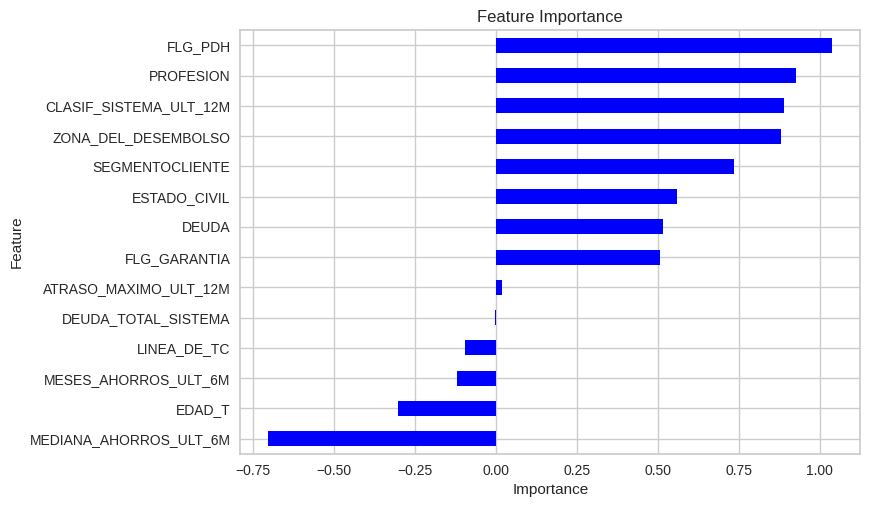

In [ ]:
fi=pd.Series(logit.coef_[0],index=logit.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [ ]:
logit_2 = LogisticRegression()
logit_2.fit(X_train_t3_p, y_train)
pred_train_logit_2 = logit_2.predict_proba(X_train_t3_p)
pred_test_logit_2 = logit_2.predict_proba(X_test_t3_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_2[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_2[:,1])))

Train set
Logistic regression roc-auc: 0.7575954304978958
Test set
Logistic regression roc-auc: 0.7355226306877231


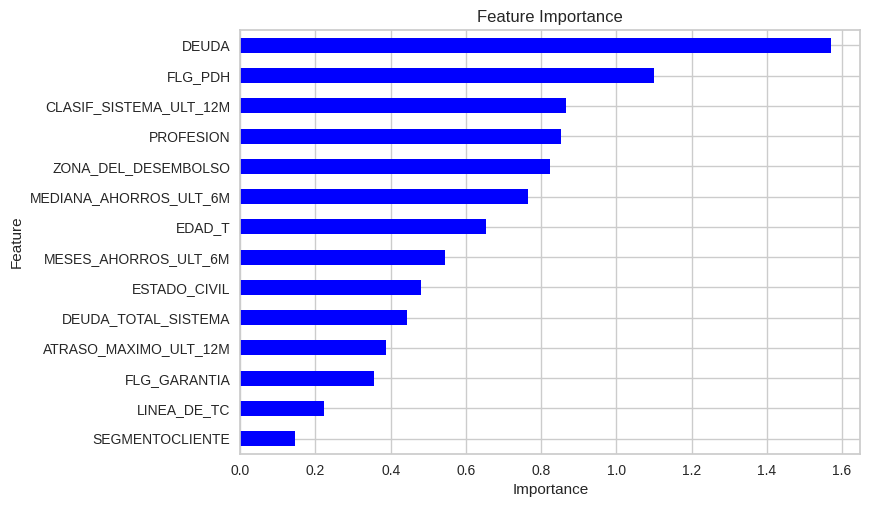

In [ ]:
fi=pd.Series(logit_2.coef_[0],index=logit_2.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [ ]:
rf = RandomForestClassifier(n_estimators=300, random_state=39)
rf.fit(X_train_t2_p, y_train)
pred_train_rf = rf.predict_proba(X_train_t2_p)
pred_test_rf = rf.predict_proba(X_test_t2_p)
print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train_rf[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.740761811394633


In [ ]:
gbc = GradientBoostingClassifier(n_estimators=300, random_state=44)
gbc.fit(X_train_t2_p, y_train)
pred_train_gbc = gbc.predict_proba(X_train_t2_p)
pred_test_gbc = gbc.predict_proba(X_test_t2_p)
print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train_gbc[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))

Train set
Gradient Boosted Trees roc-auc: 0.8648923106172073
Test set
Gradient Boosted Trees roc-auc: 0.7473170957300912


## 6. Técnicas de balanceo
En este punto, propongamos algunos métodos de balanceo y revisemos su impacto en el performance del modelo candidato

In [ ]:
df_clase.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC'],
      dtype='object')

In [ ]:
X_y_train = pd.concat([X_train_t2_p.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['FLG_DEFAULT_12M'].value_counts()
print(count_nondefault,count_default)

20943 1417


In [ ]:
X_y_train.shape

(22360, 15)

In [ ]:
# Separamos la muestra en 2 partes: defaults y no defaults
nondefaults = X_y_train[X_y_train['FLG_DEFAULT_12M'] == 0]
defaults = X_y_train[X_y_train['FLG_DEFAULT_12M'] == 1]
print(nondefaults.shape)
print(defaults.shape)

(20943, 15)
(1417, 15)


In [ ]:
# Reducimos la muestra de nondefaults
nondefaults_under = nondefaults.sample(count_default)
print(nondefaults_under.shape)

(1417, 15)


In [ ]:
# Unimos la muestra de defaults y la de nondefaults reducida
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Verificamos los nros de defaults y no defaults
print(X_y_train_under['FLG_DEFAULT_12M'].value_counts())

FLG_DEFAULT_12M
0    1417
1    1417
Name: count, dtype: int64


In [ ]:
X_y_train_under.shape

(2834, 15)

In [ ]:
X_train_rus=X_y_train_under.drop(columns='FLG_DEFAULT_12M')
X_train_rus.head()

,SEGMENTOCLIENTE,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_GARANTIA,MEDIANA_AHORROS_ULT_6M,MESES_AHORROS_ULT_6M,LINEA_DE_TC,EDAD_T,DEUDA,DEUDA_TOTAL_SISTEMA,ATRASO_MAXIMO_ULT_12M
0,0.151884,-0.229072,-0.171220,-0.497639,0.084419,-0.424542,0.033388,0.335650,0.0,0.168708,-0.615385,-0.432034,0.064455,0.0
1,0.151884,0.344459,0.631614,0.039208,-0.390857,0.134467,-1.267551,0.571065,-5.0,0.227705,-0.692308,2.062394,-0.281032,0.0
2,0.151884,0.485856,-0.171220,-0.273802,-0.136696,0.134467,0.033388,-0.261589,0.0,0.000000,0.000000,0.421780,0.531544,2.0
3,-0.419546,-0.229072,-0.171220,0.039208,0.084419,0.134467,0.033388,0.208431,0.0,0.100881,-0.384615,-0.257895,0.118193,0.0
4,0.151884,-0.229072,-0.171220,0.039208,0.176343,0.134467,0.033388,1.207823,0.0,-0.438297,0.615385,0.043038,-0.135177,0.0


In [ ]:
y_train_rus=X_y_train_under['FLG_DEFAULT_12M']
y_train_rus.value_counts()

FLG_DEFAULT_12M
0    1417
1    1417
Name: count, dtype: int64

In [ ]:
logit_rus = LogisticRegression()
logit_rus.fit(X_train_rus, y_train_rus)

LogisticRegression()

In [ ]:
# Modelo sin balanceo y con balanceo
pred_train_logit = logit.predict_proba(X_train_t2_p)
pred_train_logit_rus = logit_rus.predict_proba(X_train_rus)
print('Sin Balanceo Train roc_auc: ', roc_auc_score(y_train, pred_train_logit[:,1]), 'GINI Train ', 2*roc_auc_score(y_train, pred_train_logit[:,1])-1)
print('Con Balanceo Train roc_auc: ', roc_auc_score(y_train_rus, pred_train_logit_rus[:,1]), 'GINI Train ', 2*roc_auc_score(y_train_rus, pred_train_logit_rus[:,1])-1)

Sin Balanceo Train roc_auc:  0.7587740842157483 GINI Train  0.5175481684314966
Con Balanceo Train roc_auc:  0.7670538560647526 GINI Train  0.5341077121295053


In [ ]:
# Modelo sin balanceo y con balanceo
pred_test_logit = logit.predict_proba(X_test_t2_p)
pred_test_logit_rus = logit_rus.predict_proba(X_test_t2_p)
print('Sin Balanceo Train roc_auc: ', roc_auc_score(y_test, pred_test_logit[:,1]), 'GINI Train ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)
print('Con Balanceo Train roc_auc: ', roc_auc_score(y_test, pred_test_logit_rus[:,1]), 'GINI Train ', 2*roc_auc_score(y_test, pred_test_logit_rus[:,1])-1)

Sin Balanceo Train roc_auc:  0.7386640102961273 GINI Train  0.47732802059225454
Con Balanceo Train roc_auc:  0.740899083306249 GINI Train  0.48179816661249797


### 7. Valoración del Modelo
Empecemos a revisar con el modelo final algunas métricas de valoración del modelo

### Evaluemos ROC AUC sobre el modelo ganador

In [ ]:
from yellowbrick.classifier import ROCAUC

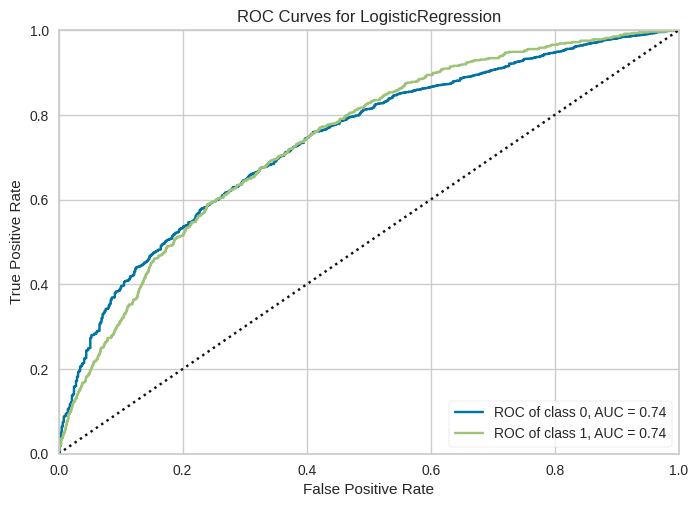

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer2 = ROCAUC(logit, is_fitted=True, micro=False, macro=False,)
visualizer2.fit(X_test_t2_p, y_test)
visualizer2.score(X_test_t2_p, y_test)
visualizer2.show()

## Métricas de Clasificación

### Accuracy
Porcentaje de predicciones correctas

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
br_test=y_test.value_counts() / len(y_test)
br_test

FLG_DEFAULT_12M
0    0.936665
1    0.063335
Name: count, dtype: float64

In [ ]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [ ]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Logit test:', accuracy_score(y_test, logit.predict(X_test_t2_p)))

Accuracy Baseline test:  0.9366652754590985
Accuracy Logit test: 0.9366652754590985


In [ ]:
from sklearn.metrics import (
    #accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

In [ ]:
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, Logit test:',  balanced_accuracy_score(y_test,logit.predict(X_test_t2_p)))

Balanced accuracy, Baseline test:  0.5
Balanced accuracy, Logit test: 0.5030721013375019


### Como está prediciendo el modelo?

In [ ]:
preds_1 = pd.DataFrame(logit.predict(X_test_t2_p), columns = ['loan_status'])
preds_1.value_counts()

loan_status
0              9576
1                 8
Name: count, dtype: int64

## Identificamos un punto de corte óptimo que maximice el F1 Score

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold
import warnings
warnings.filterwarnings('ignore')

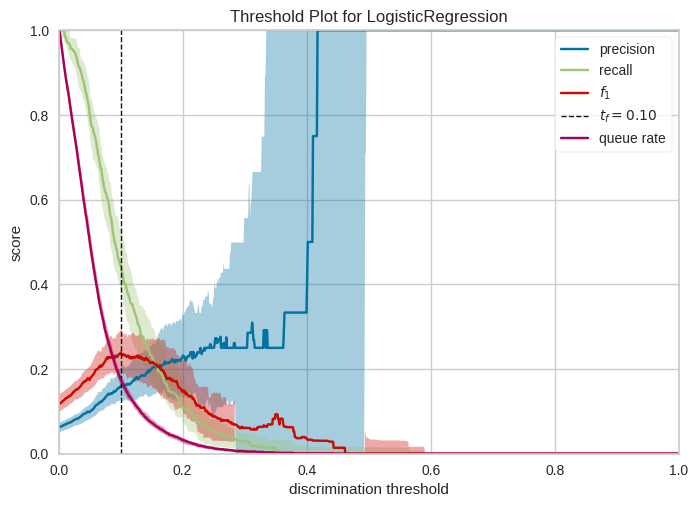

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [ ]:
visualizer = DiscriminationThreshold(logit, is_fitted=True, random_state=0, argmax='fscore')
visualizer.fit(X_test_t2_p, y_test)
visualizer.score(X_test_t2_p, y_test)
visualizer.show()

In [ ]:
preds_2 = pd.DataFrame(logit.predict_proba(X_test_t2_p)[:,1], columns = ['prob_default'])
preds_2['loan_status'] = preds_2['prob_default'].apply(lambda x: 1 if x > 0.10 else 0)
preds_2['loan_status'].value_counts()

loan_status
0    7829
1    1755
Name: count, dtype: int64

In [ ]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Logit test:', accuracy_score(y_test, logit.predict(X_test_t2_p)))
print('Accuracy Logit test Corte Optimo:', accuracy_score(y_test, preds_2['loan_status']))

Accuracy Baseline test:  0.9366652754590985
Accuracy Logit test: 0.9366652754590985
Accuracy Logit test Corte Optimo: 0.8128130217028381


In [ ]:
print('Balanced accuracy Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy Logit test:',  balanced_accuracy_score(y_test,logit.predict(X_test_t2_p)))
print('Balanced accuracy Logit test Corte Optimo:',  balanced_accuracy_score(y_test,preds_2['loan_status']))

Balanced accuracy Baseline test:  0.5
Balanced accuracy Logit test: 0.5030721013375019
Balanced accuracy Logit test Corte Optimo: 0.6520057940491892


## Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Number of cases on each class

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

In [ ]:
# Precision
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision Logit test:', precision_score(y_test,logit.predict(X_test_t2_p)))
print('Precision Logit test Corte Optimo:', precision_score(y_test,preds_2['loan_status']))

Precision Baseline test:  0.0
Precision Logit test: 0.5
Precision Logit test Corte Optimo: 0.16182336182336182


In [ ]:
# Recall
print('Recall Baseline test: ', recall_score(y_test, y_test_base))
print('Recall Logit test:', recall_score(y_test,logit.predict(X_test_t2_p)))
print('Recall Logit test Corte Optimo:', recall_score(y_test,preds_2['loan_status']))

Recall Baseline test:  0.0
Recall Logit test: 0.006589785831960461
Recall Logit test Corte Optimo: 0.46787479406919275


In [ ]:
# F1-Score
print('F-measure Baseline test: ', f1_score(y_test, y_test_base))
print('F-measure GBC test:', f1_score(y_test, logit.predict(X_test_t2_p)))
print('F-measure GBC test Corte Optimo:', f1_score(y_test, preds_2['loan_status']))

F-measure Baseline test:  0.0
F-measure GBC test: 0.013008130081300813
F-measure GBC test Corte Optimo: 0.24047417442845045


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, preds_2['loan_status'])

print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score: ', fscore)

Precision:  [0.95874313 0.16182336]
Recall:  [0.83613679 0.46787479]
F1-score:  [0.89325241 0.24047417]


## Matriz de Confusión

TN | FP

FN | TP

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_base, labels=[0,1])

array([[8977,    0],
       [ 607,    0]])

In [ ]:
confusion_matrix(y_test, logit.predict(X_test_t2_p), labels=[0,1])

array([[8973,    4],
       [ 603,    4]])

In [ ]:
confusion_matrix(y_test, preds_2['loan_status'], labels=[0,1])

array([[7506, 1471],
       [ 323,  284]])

### 8. Calibración del Modelo:
En esta parte verificaremos, y de ser necesario, calibraremos el modelo revisando la relación entre los valores los ratios de default reales y las PDs promedios que arroja el modelo.

In [ ]:
from sklearn.calibration import calibration_curve

In [ ]:
# Veamos los RDs y los promedios de PDs en cada bucket para el modelo original (sin balanceo)
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, pred_test_mix[:, 1], n_bins=10, strategy='uniform')

len(mean_predicted_value), len(fraction_of_positives)

In [ ]:
mean_predicted_value

In [ ]:
fraction_of_positives

In [ ]:
# Una función para consolidar lo anterior
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Logistic Regression')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

In [ ]:
# Modelo Original, sin balanceo
plot_calibration_curve(y_test, pred_test_mix[:, 1], bins=10, strategy='uniform')

In [ ]:
from sklearn.metrics import brier_score_loss

In [ ]:
brier_score_loss(y_test, pred_test_mix[:, 1])

In [ ]:
# Modelo con Undersampling
plot_calibration_curve(y_test, pred_test_mix2[:, 1], bins=10, strategy='uniform')

In [ ]:
brier_score_loss(y_test, pred_test_mix2[:, 1])

In [ ]:
# Modelo con Oversampling
plot_calibration_curve(y_test, pred_test_mix3[:, 1], bins=10, strategy='uniform')

In [ ]:
brier_score_loss(y_test, pred_test_mix3[:, 1])

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

### Planteemos dos métodos, el ajuste por función sigmoide y el ajuste por función isotónica

In [ ]:
# Sobre el modelo original
# Calibración Sigmoide
cal_sigmoid = CalibratedClassifierCV(logit_mix, cv='prefit', method='sigmoid')
cal_sigmoid.fit(X_test_woe_enc_tot, y_test)
prob_sigmoid = cal_sigmoid.predict_proba(X_test_woe_enc_tot)[:, 1]

# Calibración Isotónica
cal_isotonic = CalibratedClassifierCV(logit_mix, cv='prefit', method='isotonic')
cal_isotonic.fit(X_test_woe_enc_tot, y_test)
prob_isotonic = cal_isotonic.predict_proba(X_test_woe_enc_tot)[:, 1]

#### Revisemos la calibración Sigmoide

In [ ]:
plot_calibration_curve(y_test, prob_sigmoid, bins=10, strategy='uniform')

### Acaso la calibración varía la discriminación del modelo?

In [ ]:
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_mix[:,1])))
print('Test set con Calibrado')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_mix[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid)))

### Ahora revisemos la calibración isotónica

In [ ]:
plot_calibration_curve(y_test, prob_isotonic, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_mix[:,1])))
print('Test set con Calibrado')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_mix[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic)))

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(pred_test_mix[:,1], prob_sigmoid)
plt.xlabel('Original Probabilities')
plt.ylabel('Calibrated Probabilities')
plt.title('Original vs Calibration')

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(pred_test_mix[:,1], prob_isotonic)
plt.xlabel('Original Probabilities')
plt.ylabel('Calibrated Probabilities')
plt.title('Original vs Calibration')

In [ ]:
# Sobre el modelo balanceado por undersampling
# Calibración Sigmoide
cal_sigmoid2 = CalibratedClassifierCV(logit_mix2, cv='prefit', method='sigmoid')
cal_sigmoid2.fit(X_test_woe_enc_tot, y_test)
prob_sigmoid2 = cal_sigmoid2.predict_proba(X_test_woe_enc_tot)[:, 1]

# Calibración Isotónica
cal_isotonic2 = CalibratedClassifierCV(logit_mix2, cv='prefit', method='isotonic')
cal_isotonic2.fit(X_test_woe_enc_tot, y_test)
prob_isotonic2 = cal_isotonic2.predict_proba(X_test_woe_enc_tot)[:, 1]

In [ ]:
# Calibración sigmoidea
plot_calibration_curve(y_test, prob_sigmoid2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_mix2[:,1])))
print('Test set con Calibrado')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid2)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_mix2[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid2)))

In [ ]:
# Calibración isotónica
plot_calibration_curve(y_test, prob_isotonic2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_mix2[:,1])))
print('Test set con Calibrado')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic2)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_mix2[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic2)))

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(pred_test_mix[:,1], prob_sigmoid2)
plt.xlabel('Original Probabilities')
plt.ylabel('Calibrated Probabilities')
plt.title('Original vs Calibration')

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(pred_test_mix[:,1], prob_isotonic2)
plt.xlabel('Original Probabilities')
plt.ylabel('Calibrated Probabilities')
plt.title('Original vs Calibration')

### Cómo se vería en el caso de la calibración del modelo con oversampling?